## CNN examples for course Deep Learning Fundamentals and Basic Tools

We will use the CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.utils import plot_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Utility functions:

In [3]:
def plot_training_curves(hd):
  nepochs = len(hd['acc'])
  epochs = range(1, nepochs+1)

  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs, hd['acc'], "r", label="train")
  plt.plot(epochs, hd['val_acc'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("Accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, hd['loss'], "r", label="train")
  plt.plot(epochs, hd['val_loss'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Loss")
  plt.legend()

  plt.show()

In [4]:
def plot_predictions(model, images, images_orig, labels, class_names):
  predictions = model.predict(images)
  num_images = images.shape[0]

  for i in range(num_images):
    plt.figure(figsize=(16, 3))

    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_orig[i])
    plt.title("%d [%s]" % (labels[i], class_names[labels[i]]))

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), predictions[i])
    plt.xticks(ticks=np.arange(10), labels=class_names)
    plt.grid(True)

    plt.show()

Data loading, the dataset is included in Keras (https://keras.io/api/datasets/cifar10/):

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airpl', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape)
print(train_labels.shape)
for t in train_labels[:10]:
  print(t[0], class_names[t[0]])

print(test_images.shape)
print(test_labels.shape)
for t in test_labels[:10]:
  print(t[0], class_names[t[0]])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
6 frog
9 truck
9 truck
4 deer
1 auto
1 auto
2 bird
7 horse
8 ship
3 cat
(10000, 32, 32, 3)
(10000, 1)
3 cat
8 ship
8 ship
0 airpl
6 frog
6 frog
1 auto
6 frog
3 cat
1 auto


Let us visualize some of the images:

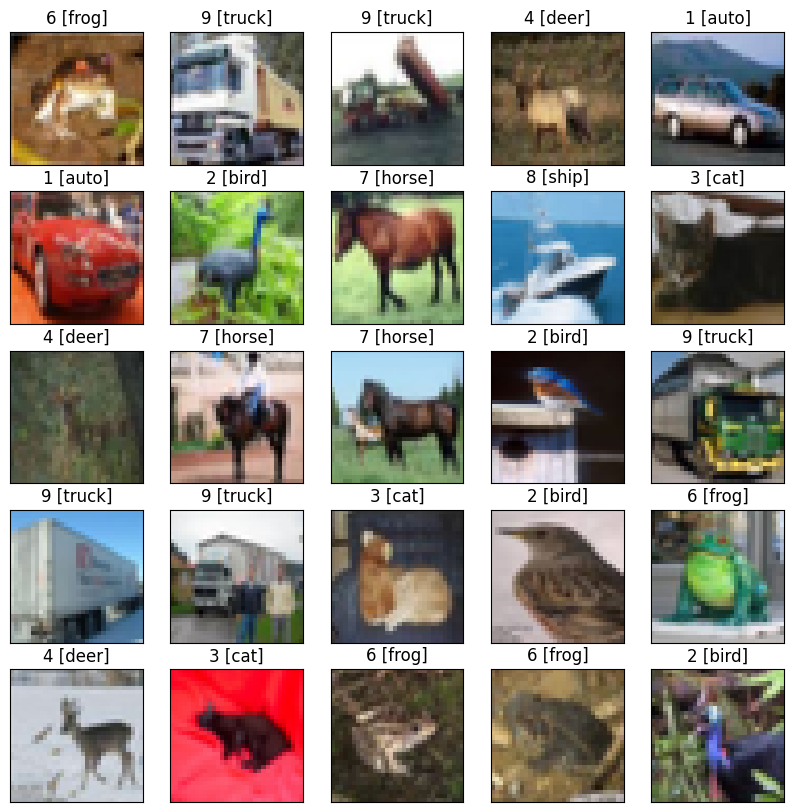

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title("%d [%s]" % (train_labels[i][0], class_names[train_labels[i][0]]))

Normalization:

In [7]:
train_images_orig = train_images
test_images_orig = test_images
mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

One-hot classes:

In [8]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, 10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, 10)

In [9]:
train_labels_one_hot.shape

(50000, 10)

In [10]:
test_labels_one_hot.shape

(10000, 10)

## Naive approach: Fully connected network

Model definition:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

None


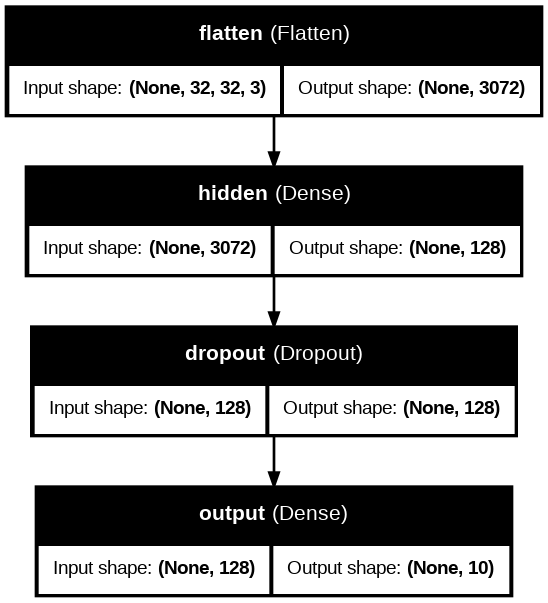

In [11]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3), name="input"))
model.add(keras.layers.Flatten(name="flatten"))
model.add(keras.layers.Dense(128, activation="relu", name="hidden"))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

Compilation:

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [13]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.2319 - loss: 110.7287 - val_acc: 0.3467 - val_loss: 31.0285
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3137 - loss: 37.7622 - val_acc: 0.3635 - val_loss: 21.8914
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3316 - loss: 28.4079 - val_acc: 0.3666 - val_loss: 18.8294
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3407 - loss: 23.3603 - val_acc: 0.3839 - val_loss: 15.9963
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3553 - loss: 19.2902 - val_acc: 0.3878 - val_loss: 12.7228
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3753 - loss: 14.9179 - val_acc: 0.3914 - val_loss: 10.7870
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3843 - loss: 11.6446 - val_acc: 0.3841 - val_loss: 8.8102
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3985 - loss: 9.1075 - val_acc: 0.3944 - val_loss: 6.9843
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 

Plots:

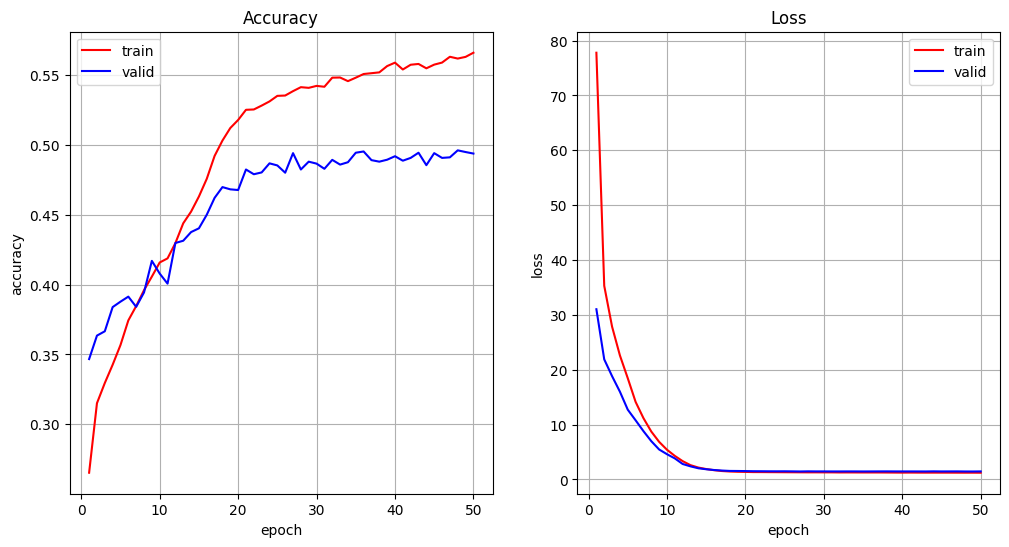

In [14]:
plot_training_curves(history.history)

Confusion matrices:

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


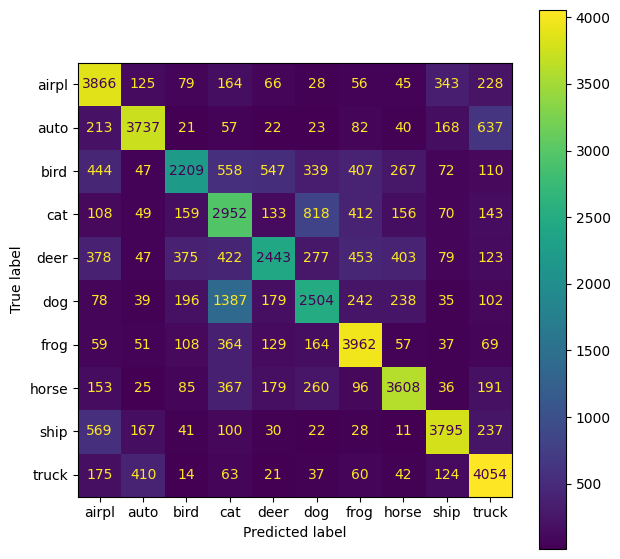

In [15]:
train_predictions = np.argmax(model.predict(train_images), axis=1)

cm = confusion_matrix(train_labels, train_predictions, labels=np.unique(train_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


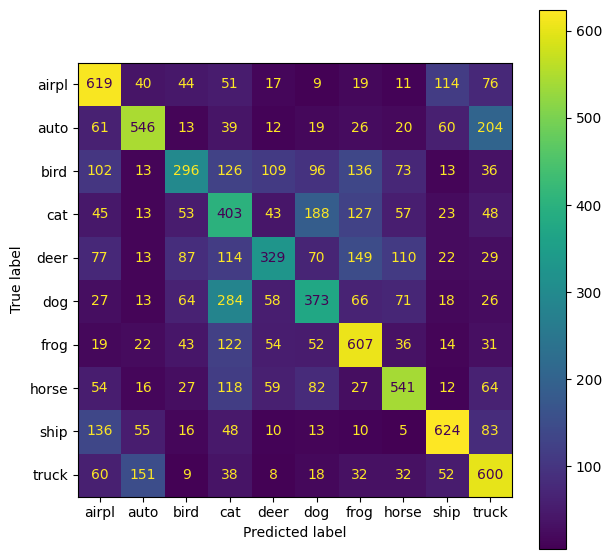

In [16]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


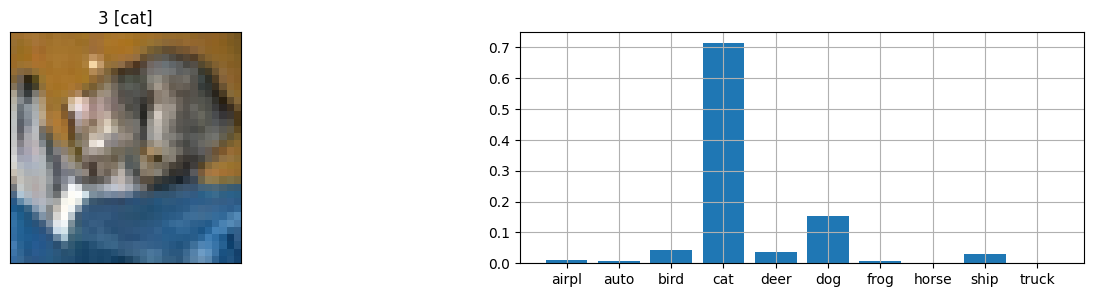

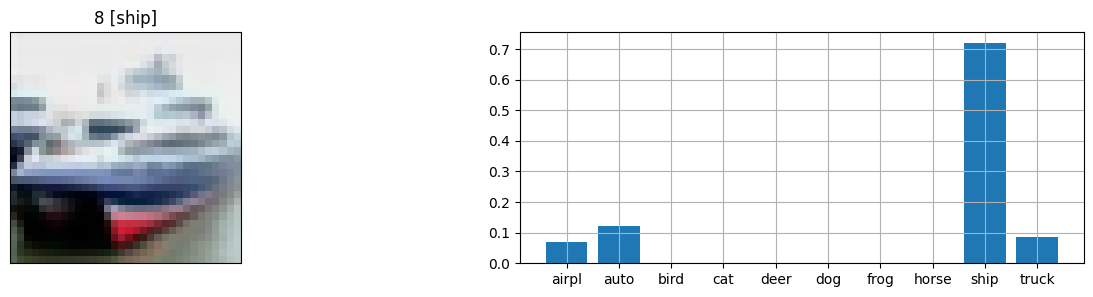

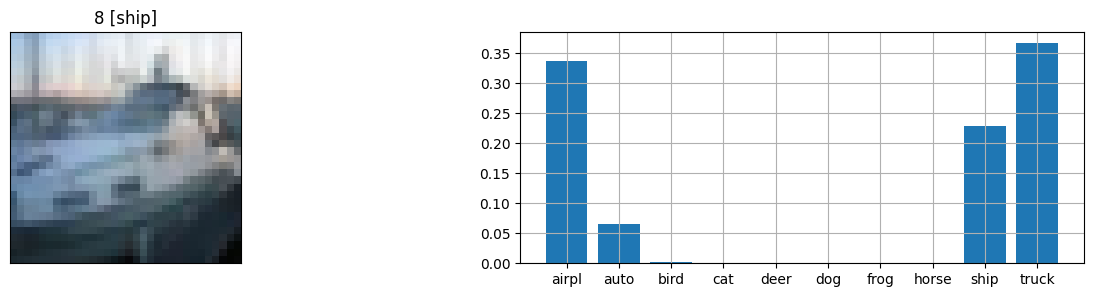

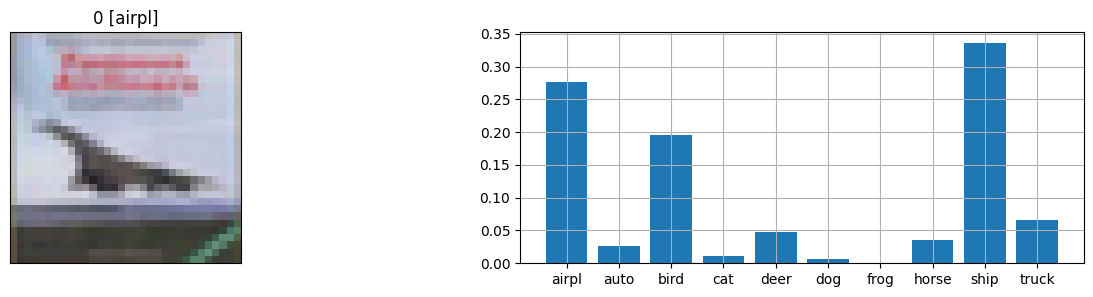

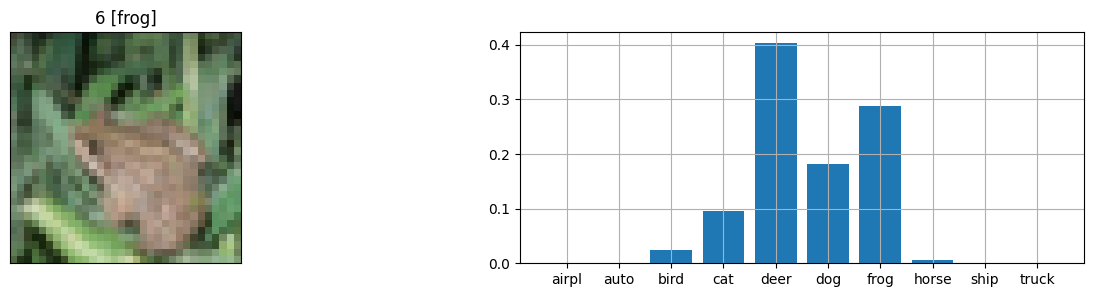

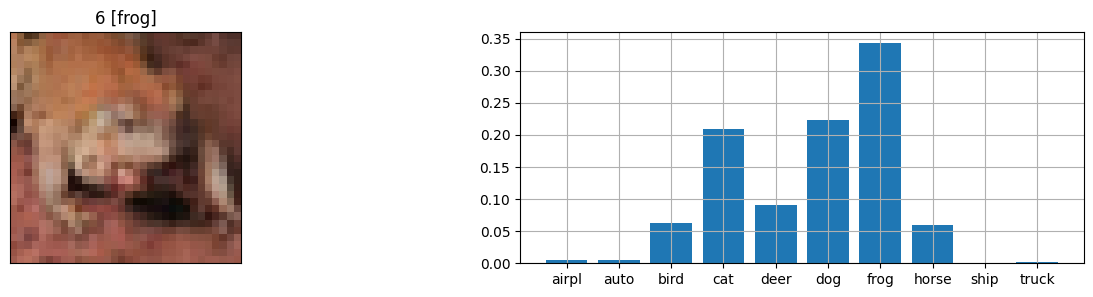

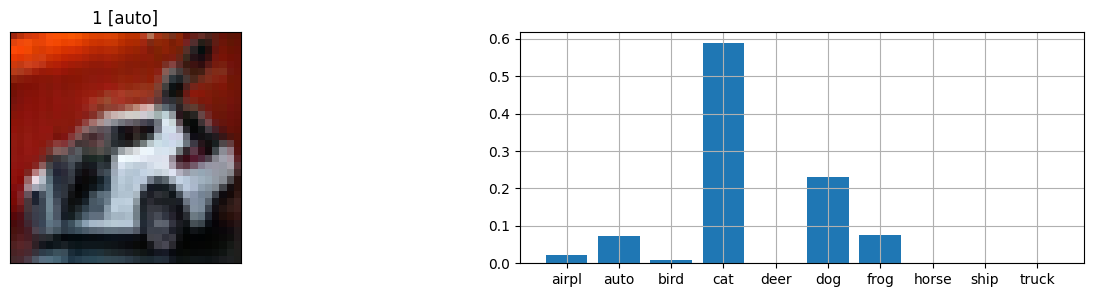

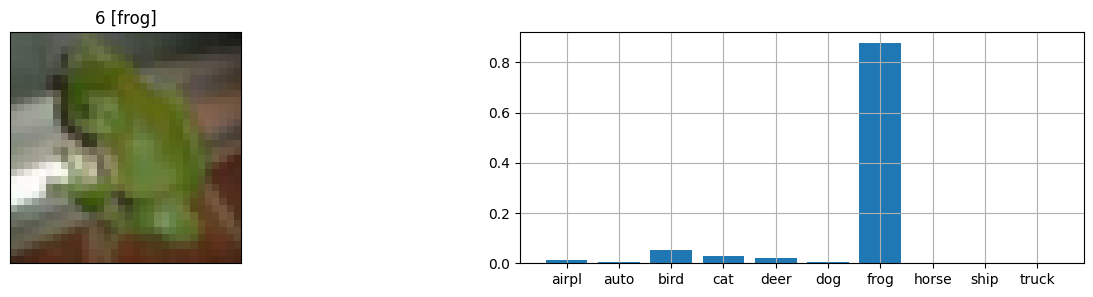

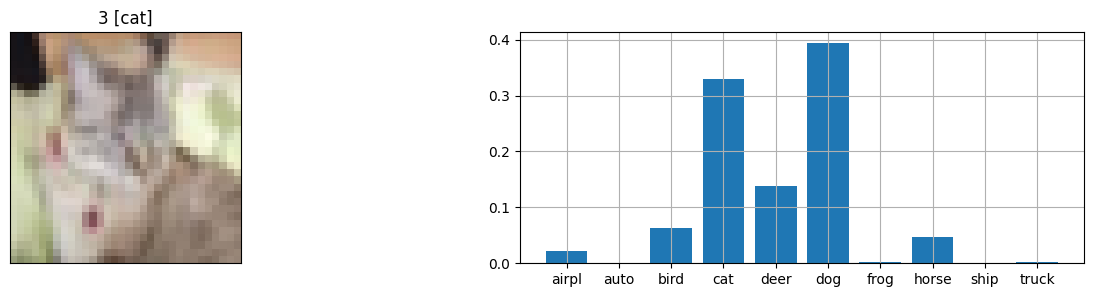

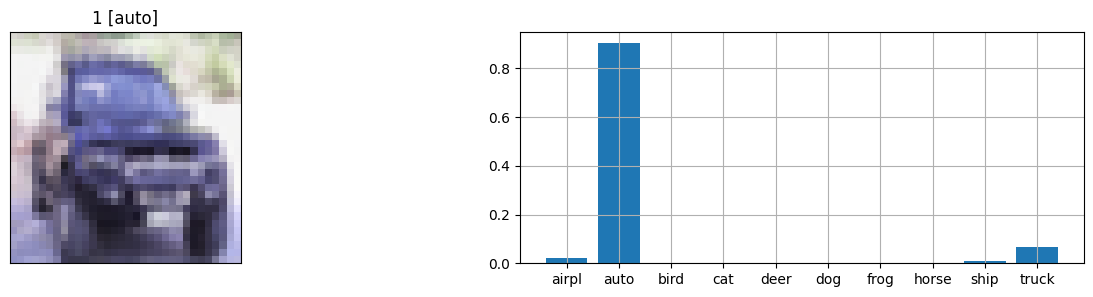

In [17]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## CNN built from scratch:

Model definition:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,389,962 (9.12 MB)

 Trainable params: 2,389,962 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

None


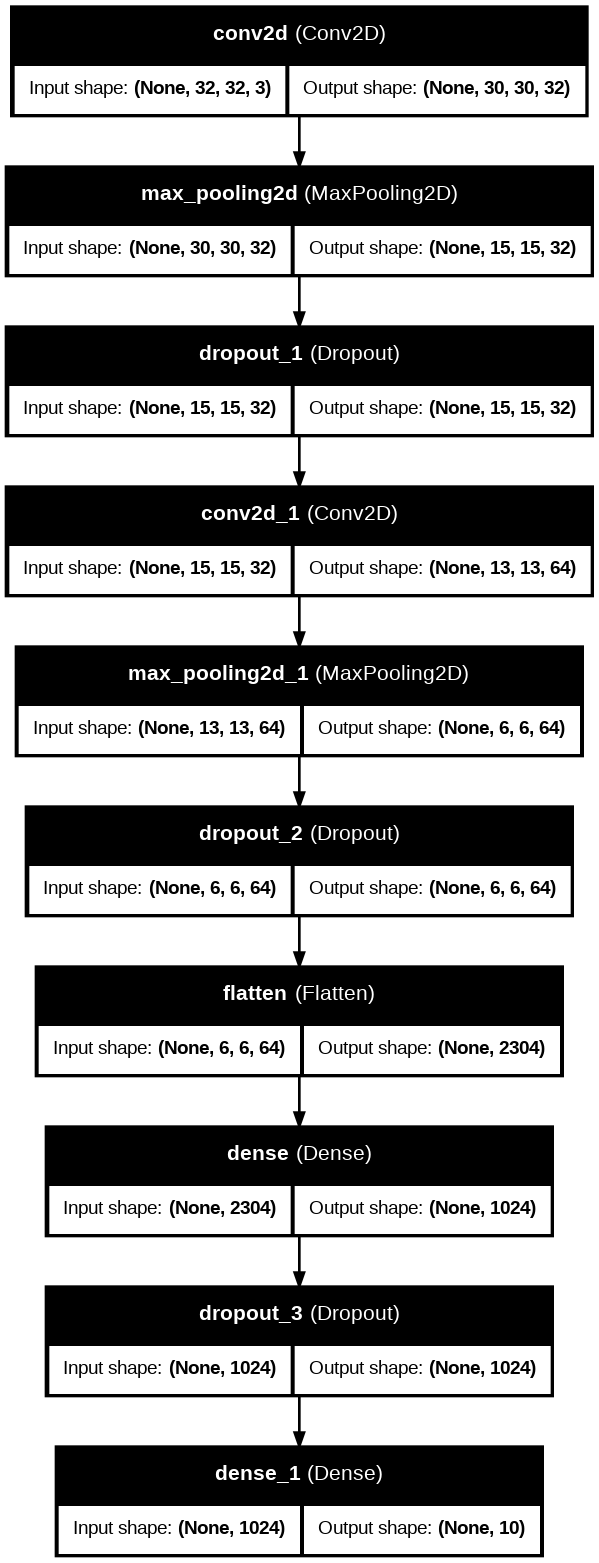

In [18]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

Compilation:

In [19]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [20]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - acc: 0.1288 - loss: 47.3647 - val_acc: 0.1108 - val_loss: 2.2989
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1878 - loss: 2.2122 - val_acc: 0.1478 - val_loss: 2.2507
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2402 - loss: 2.1067 - val_acc: 0.2119 - val_loss: 2.1407
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2637 - loss: 2.0358 - val_acc: 0.2520 - val_loss: 2.0558
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.2791 - loss: 1.9711 - val_acc: 0.2952 - val_loss: 1.9511
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.2962 - loss: 1.9161 - val_acc: 0.3012 - val_loss: 1.9301
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3180 - loss: 1.8645 - val_acc: 0.3236 - val_loss: 1.8661
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3441 - loss: 1.8045 - val_acc: 0.3370 - val_loss: 1.8416
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3584 - los

Plots:

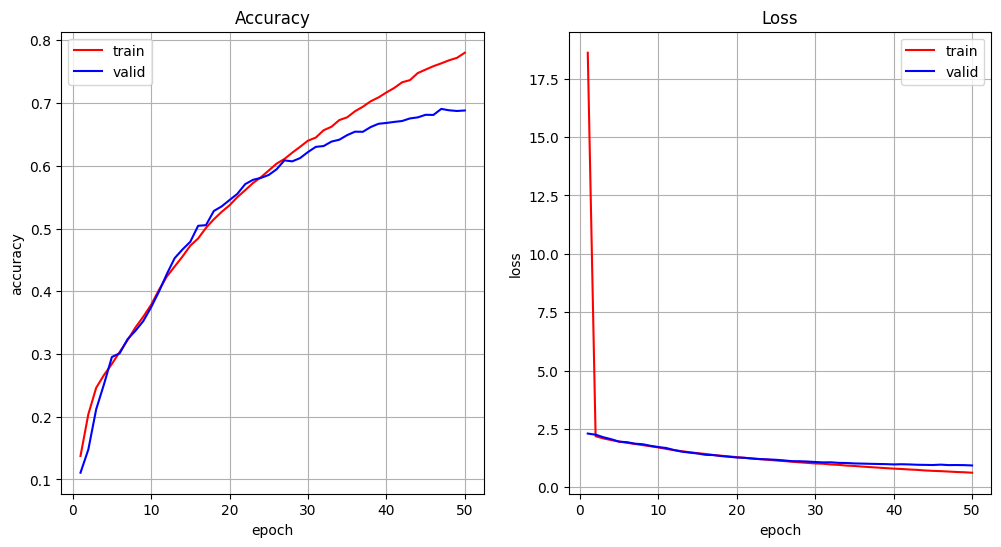

In [21]:
plot_training_curves(history.history)

Confusion matrix (test):

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


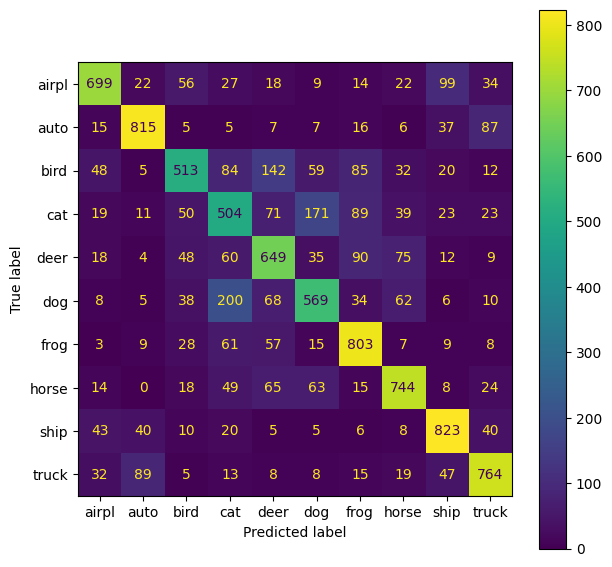

In [22]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


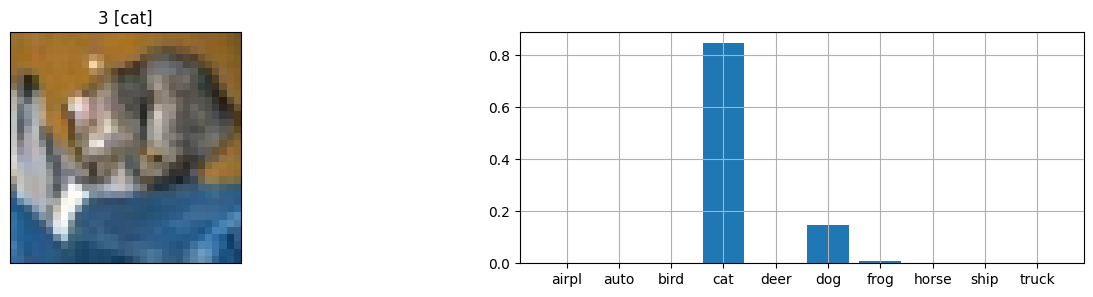

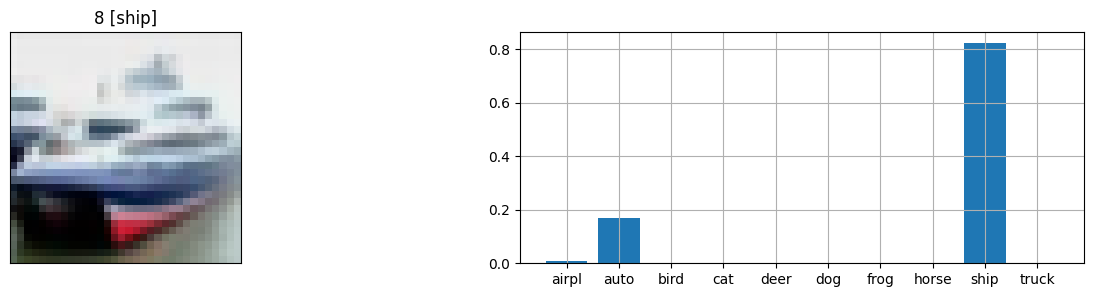

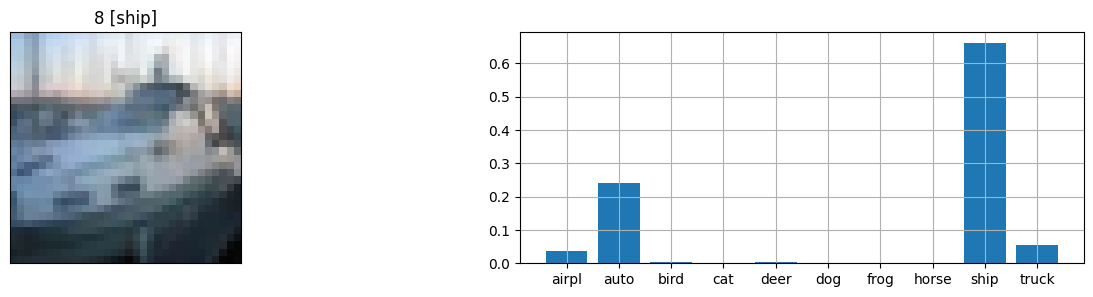

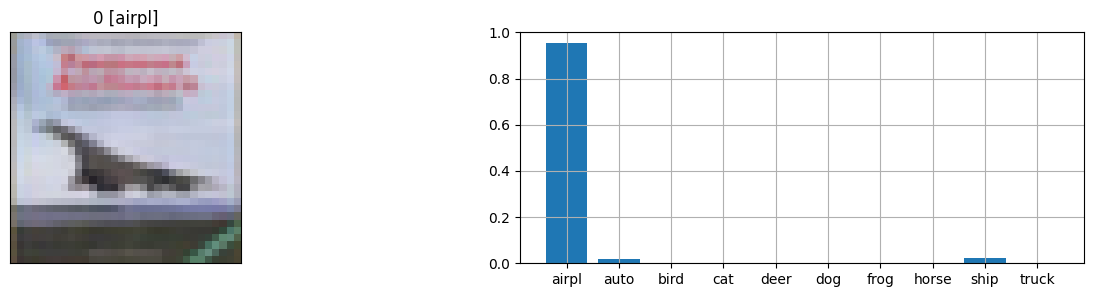

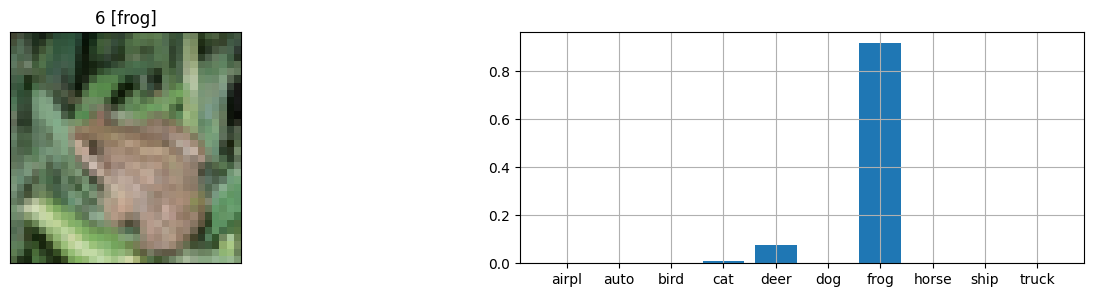

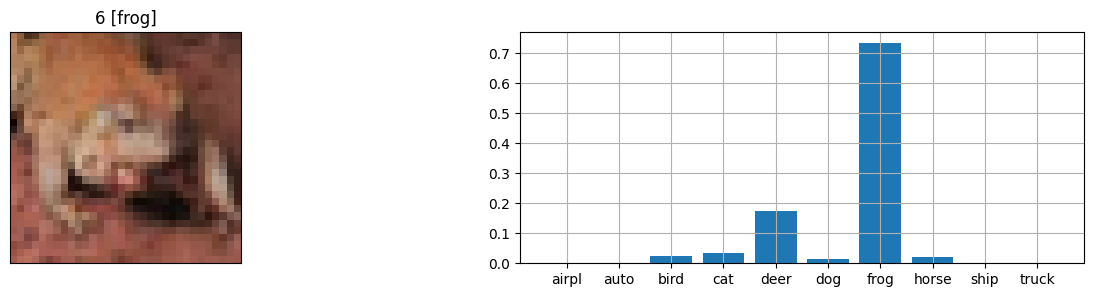

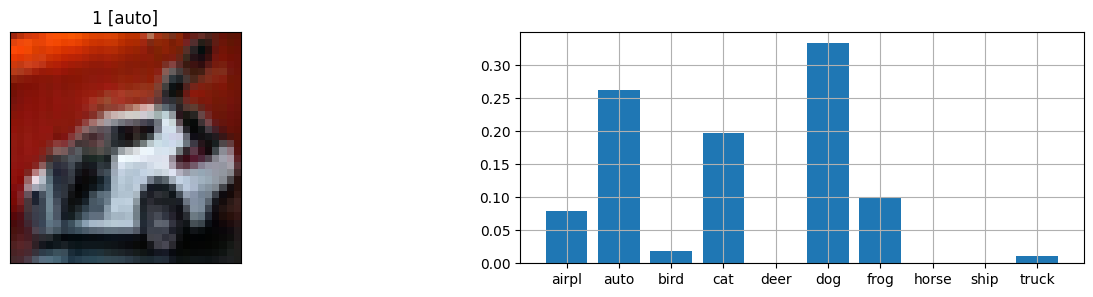

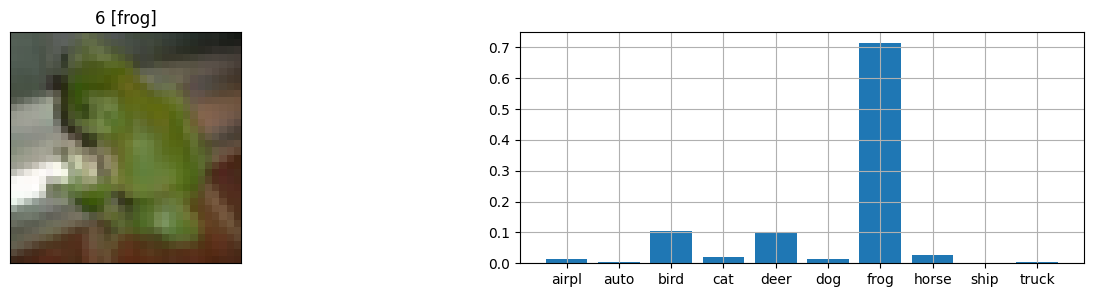

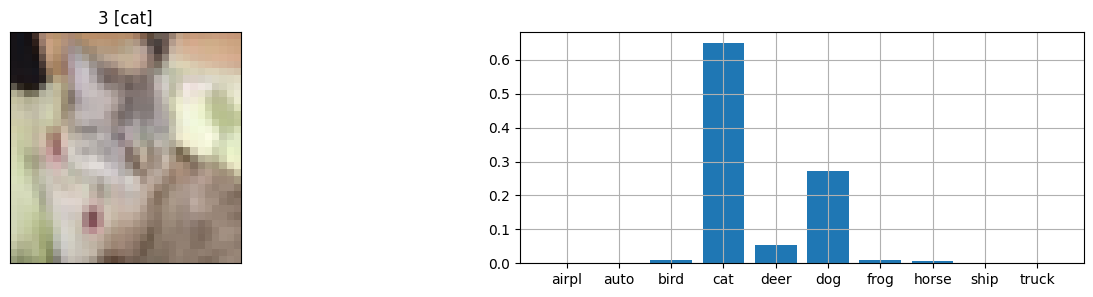

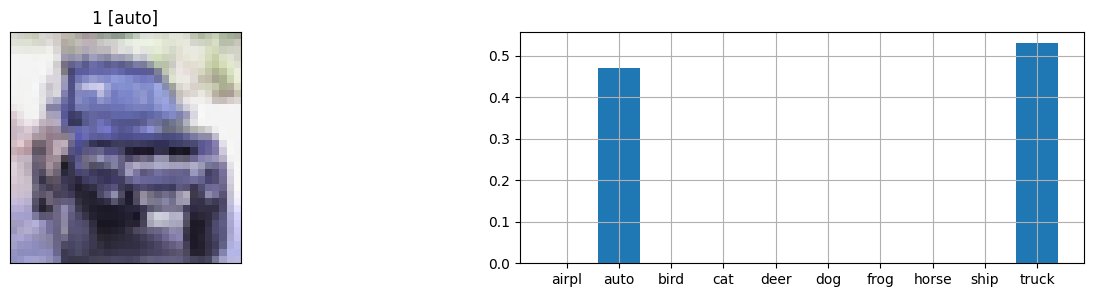

In [23]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## A more complex model that overfits the data

Model definition:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

None


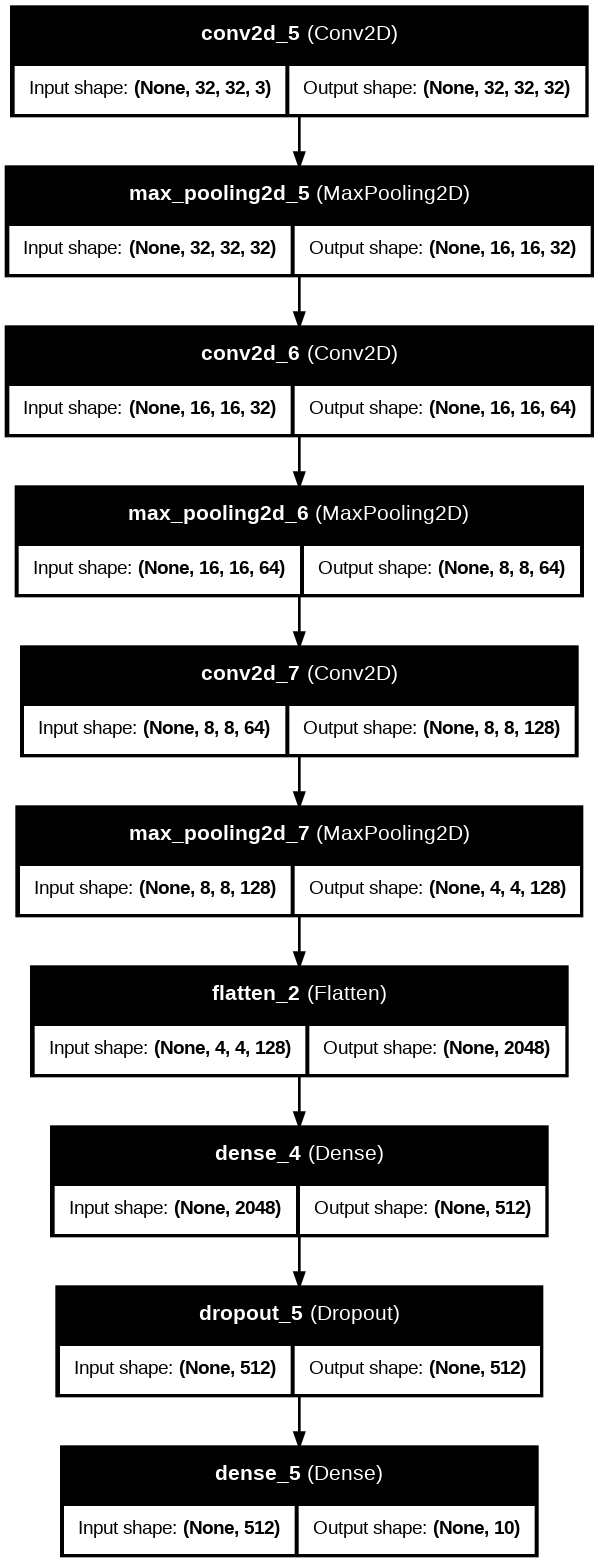

In [25]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

Compilation:

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [27]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - acc: 0.1780 - loss: 9.9851 - val_acc: 0.4065 - val_loss: 1.6593
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.3932 - loss: 1.6776 - val_acc: 0.4849 - val_loss: 1.4316
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.4788 - loss: 1.4635 - val_acc: 0.5262 - val_loss: 1.3165
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5252 - loss: 1.3372 - val_acc: 0.5636 - val_loss: 1.2216
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5636 - loss: 1.2262 - val_acc: 0.5881 - val_loss: 1.1497
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.5877 - loss: 1.1565 - val_acc: 0.6104 - val_loss: 1.0989
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6185 - loss: 1.0829 - val_acc: 0.6165 - val_loss: 1.0834
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6367 - loss: 1.0245 - val_acc: 0.6369 - val_loss: 1.0302
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6538

Plots:

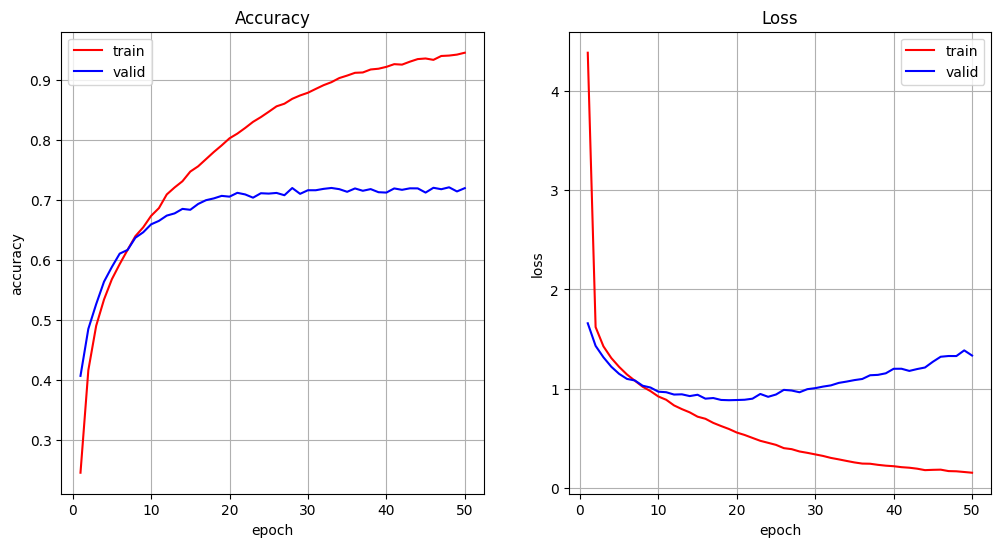

In [28]:
plot_training_curves(history.history)

Confusion matrix (test):

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


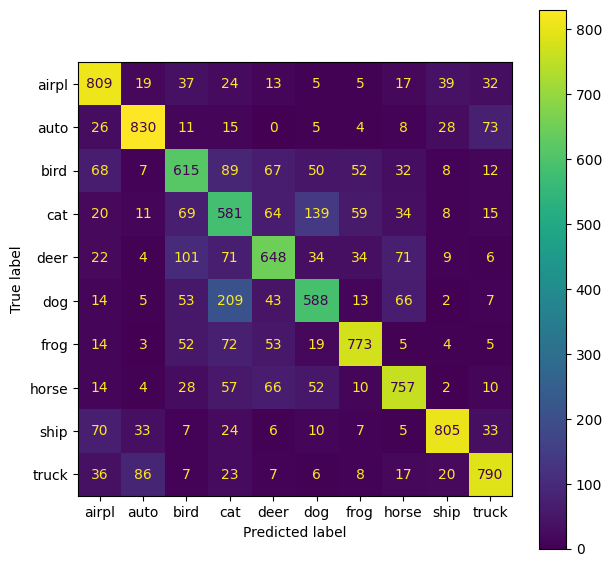

In [29]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


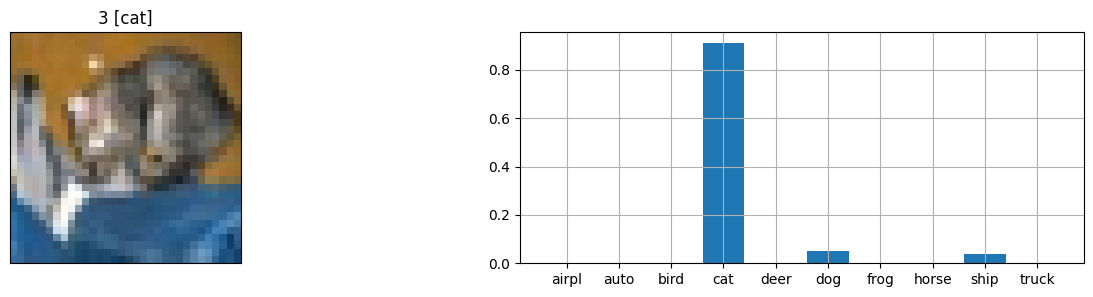

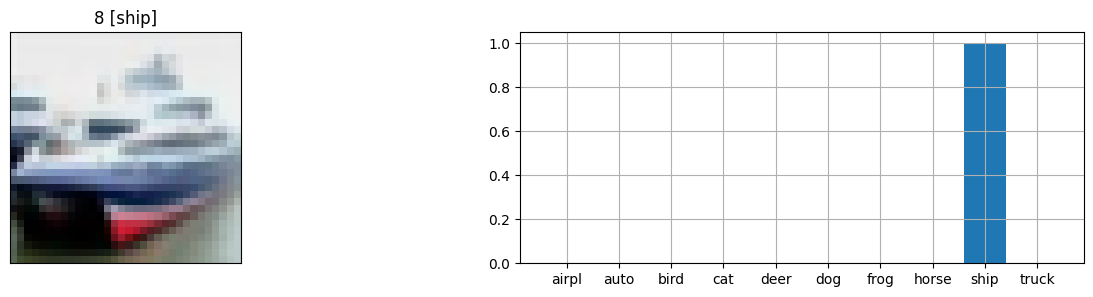

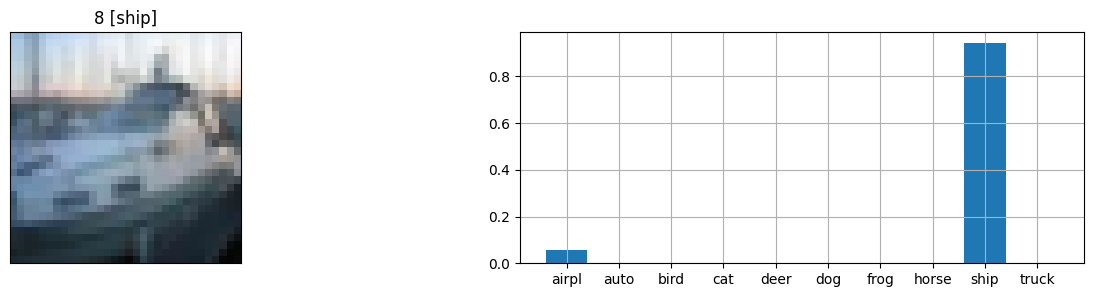

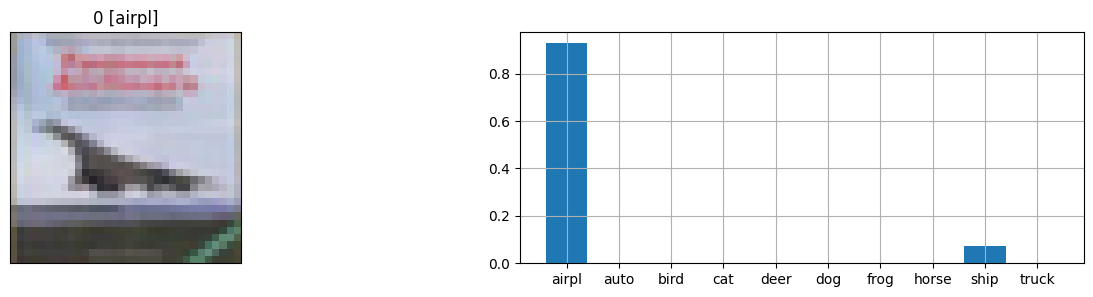

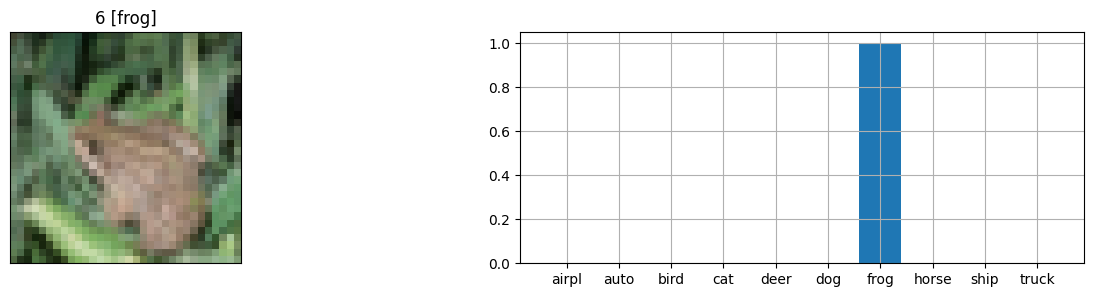

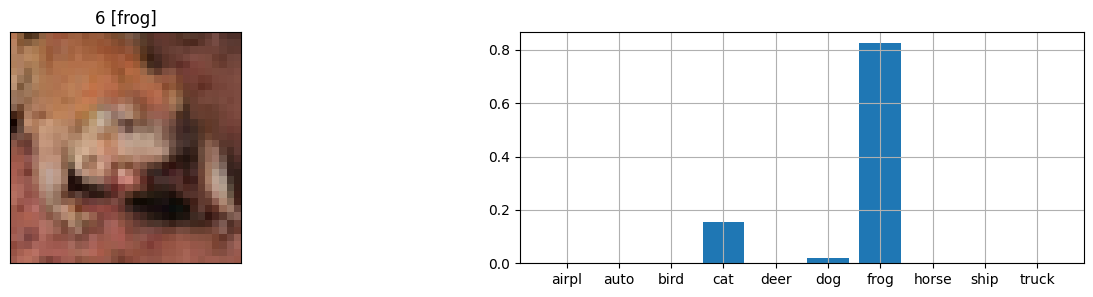

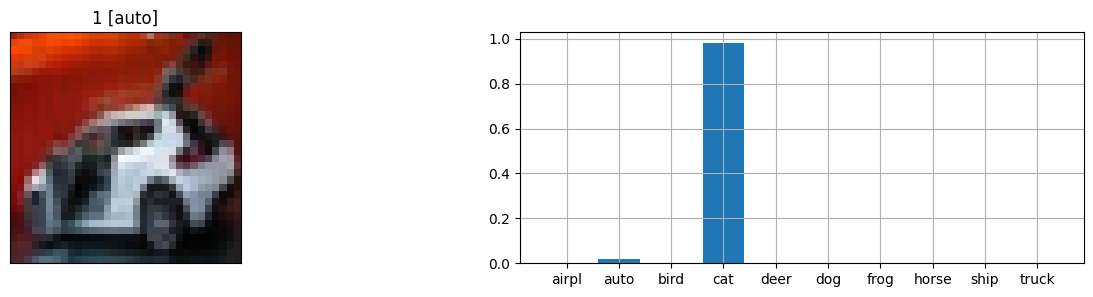

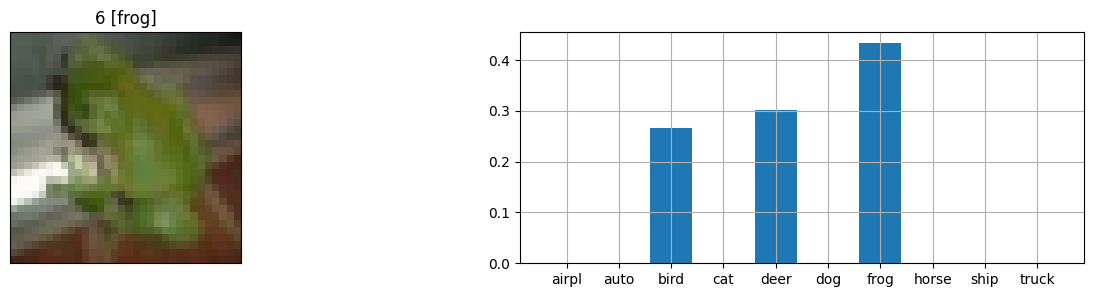

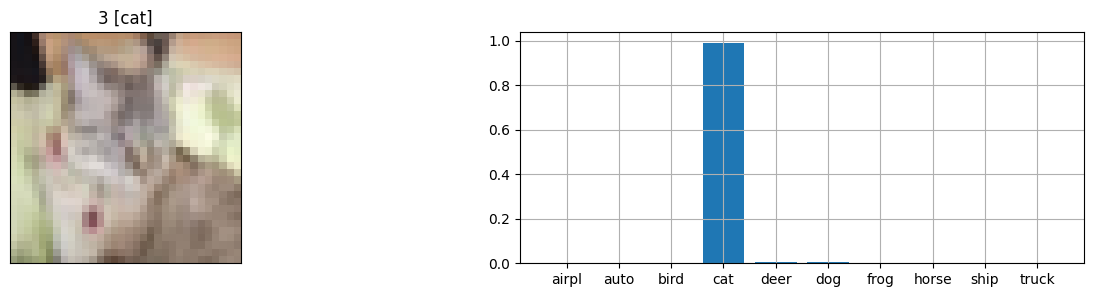

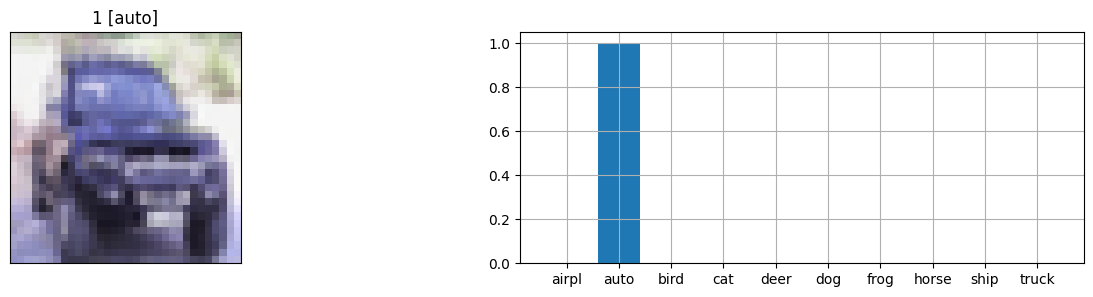

In [30]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Data augmentation

Data augmentation layers:

In [88]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.RandomFlip("horizontal", dtype=tf.int32),
    tf.keras.layers.RandomRotation(0.05, dtype=tf.int32),
    tf.keras.layers.RandomTranslation(0.1, 0.1, dtype=tf.int32),
  ]
)

Plot original images:

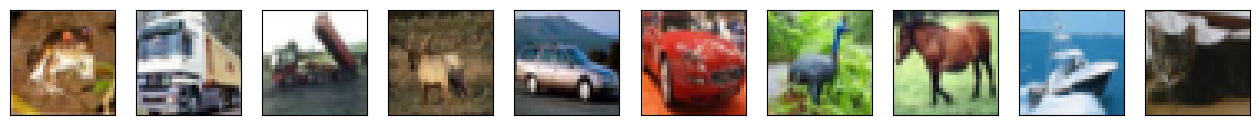

In [89]:
plt.figure(figsize=(16, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_orig[i])

Plot randomly augmented images:

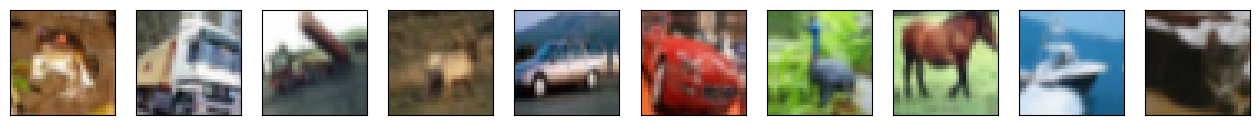

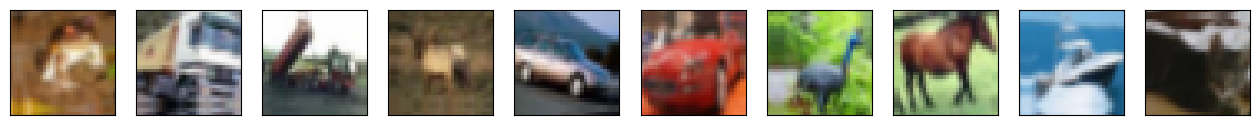

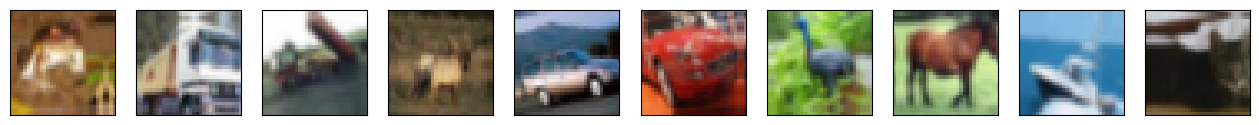

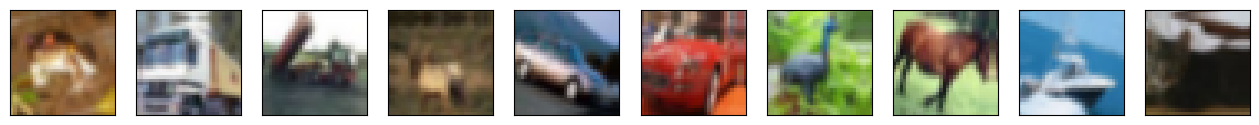

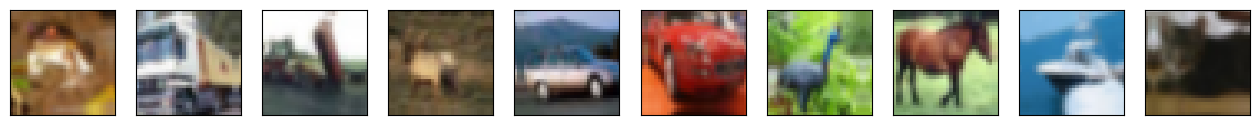

In [91]:
for k in range(5):
  plt.figure(figsize=(16, 3))
  augim = data_augmentation(train_images_orig[:10])
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(augim[i])

Let us see if augmentation improves our model:

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_11 (RandomFlip)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_11 (RandomRotation)  │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_8                 │ (None, 32, 32, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

None


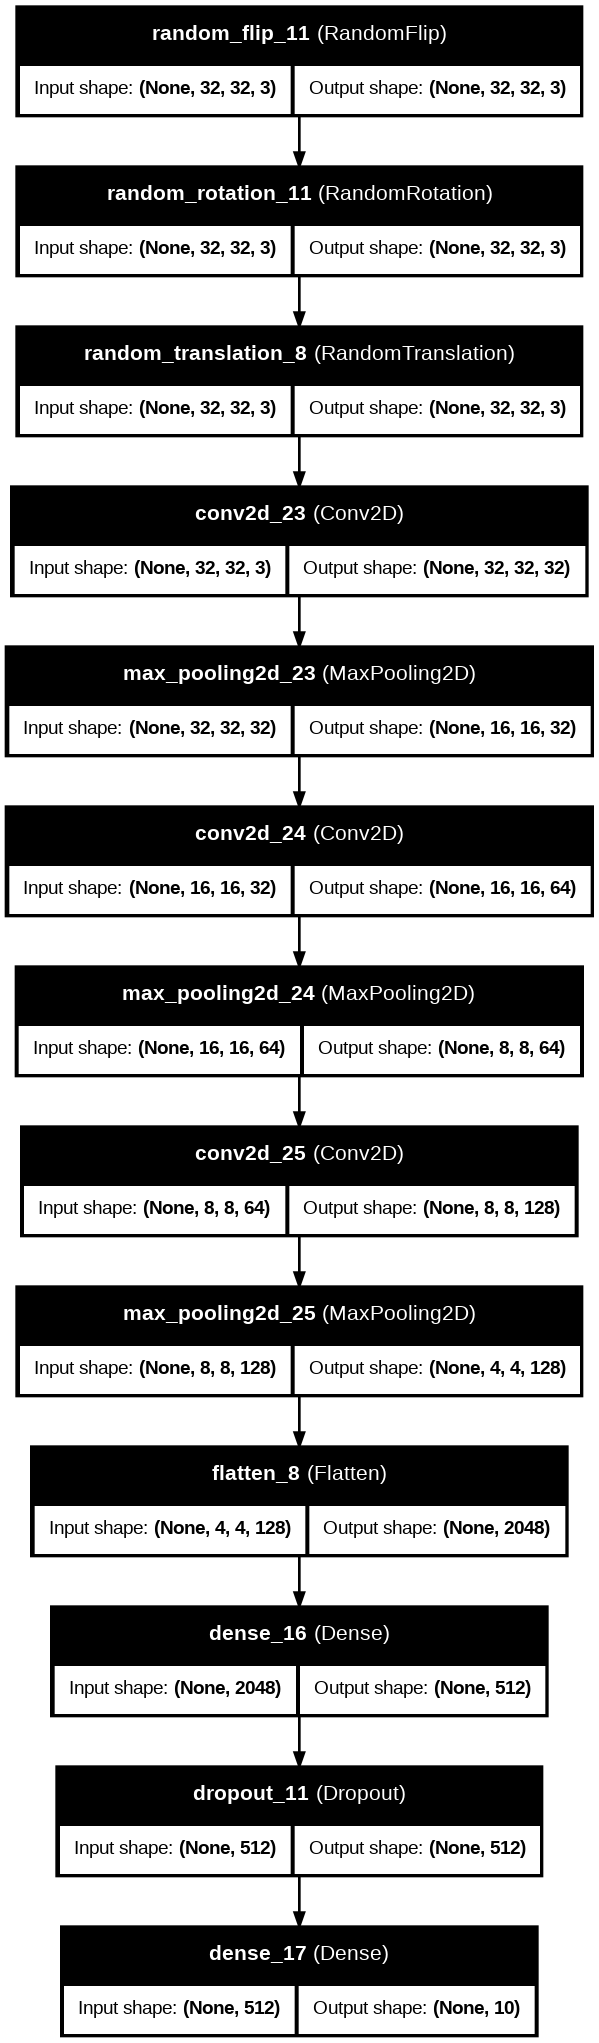

In [92]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.RandomFlip("horizontal"))
model.add(tf.keras.layers.RandomRotation(0.05))
model.add(tf.keras.layers.RandomTranslation(0.1, 0.1))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

Compilation:

In [93]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [94]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.1748 - loss: 10.1969 - val_acc: 0.3982 - val_loss: 1.6734
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.3766 - loss: 1.7212 - val_acc: 0.4870 - val_loss: 1.4101
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.4503 - loss: 1.5329 - val_acc: 0.5108 - val_loss: 1.3629
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.4893 - loss: 1.4464 - val_acc: 0.5336 - val_loss: 1.3140
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5133 - loss: 1.3720 - val_acc: 0.5507 - val_loss: 1.2822
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5437 - loss: 1.3026 - val_acc: 0.5845 - val_loss: 1.1907
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5499 - loss: 1.2719 - val_acc: 0.5904 - val_loss: 1.1971
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5667 - loss: 1.2144 - val_acc: 0.5997 - val_loss: 1.1612
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.577

Plots:

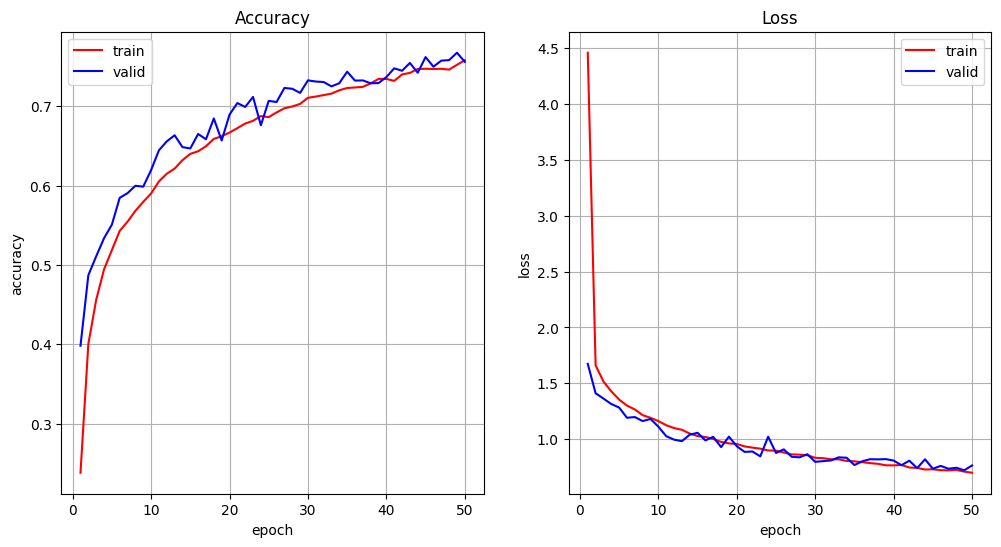

In [95]:
plot_training_curves(history.history)

Confusion matrix (test):

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


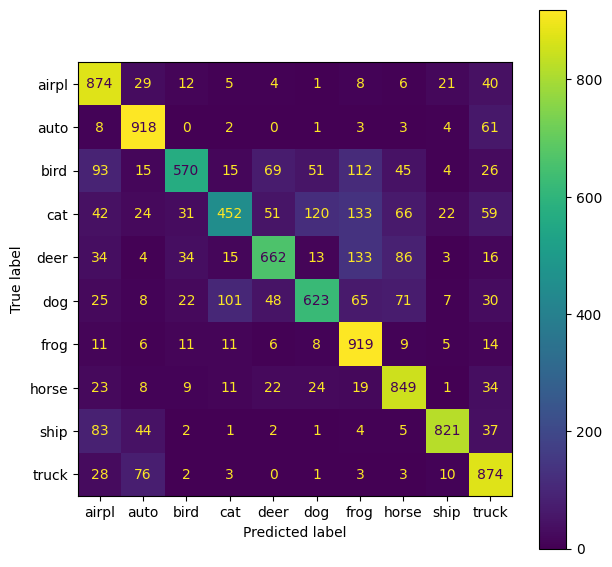

In [96]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_labels, test_predictions, labels=np.unique(test_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


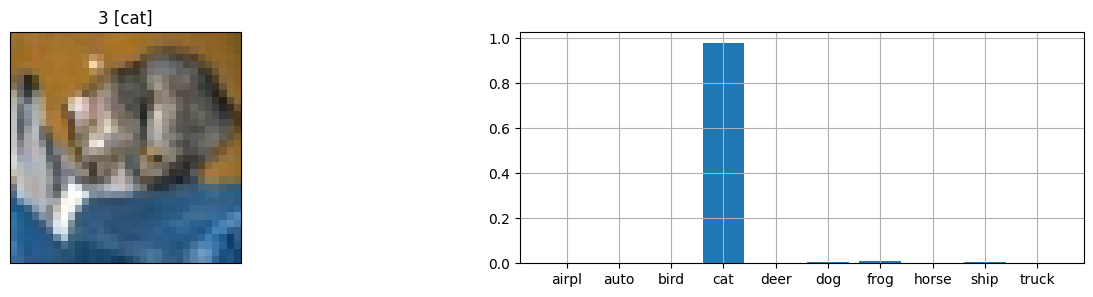

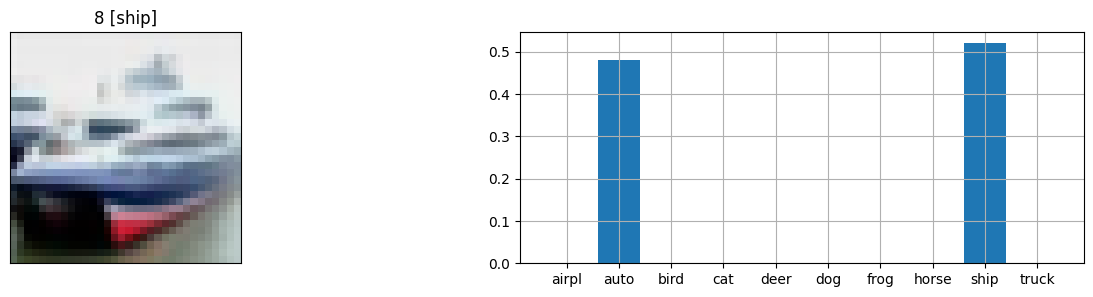

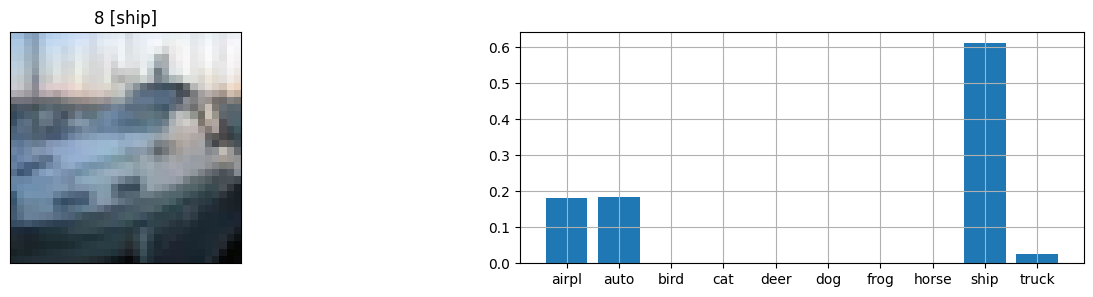

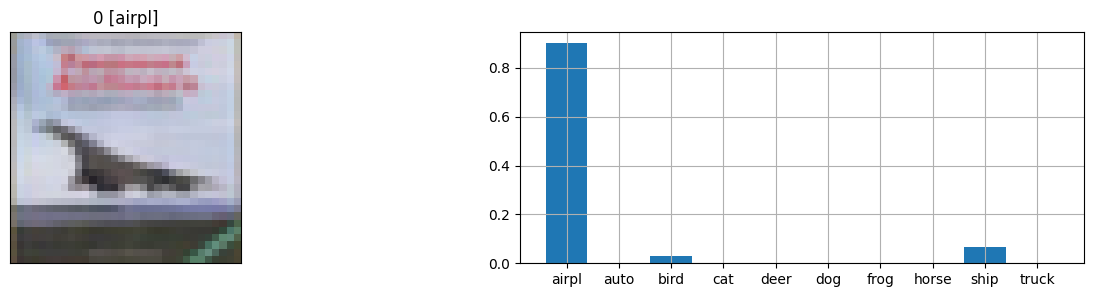

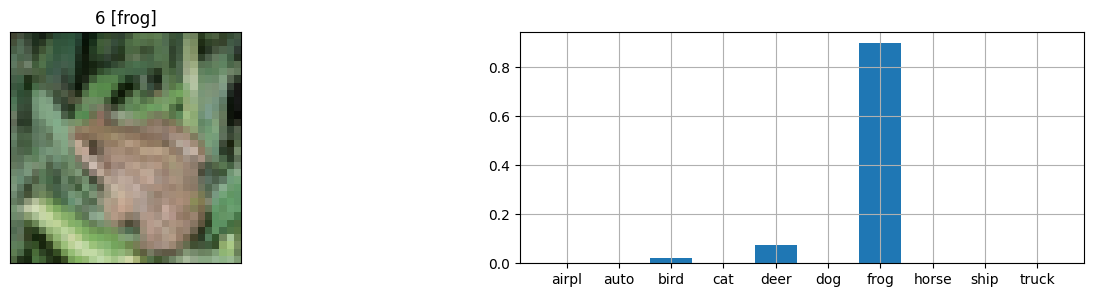

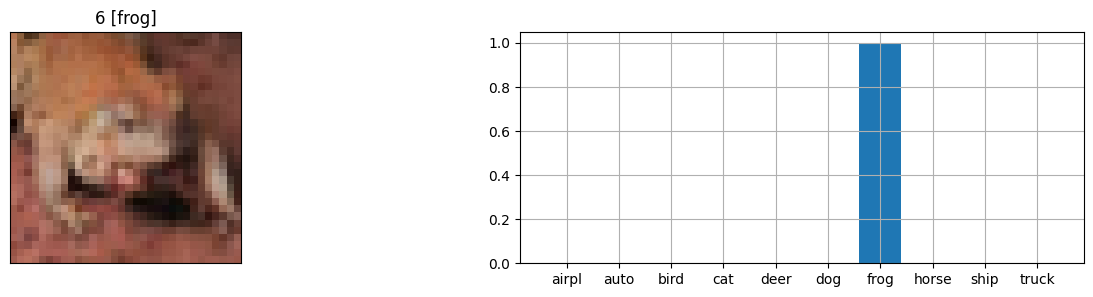

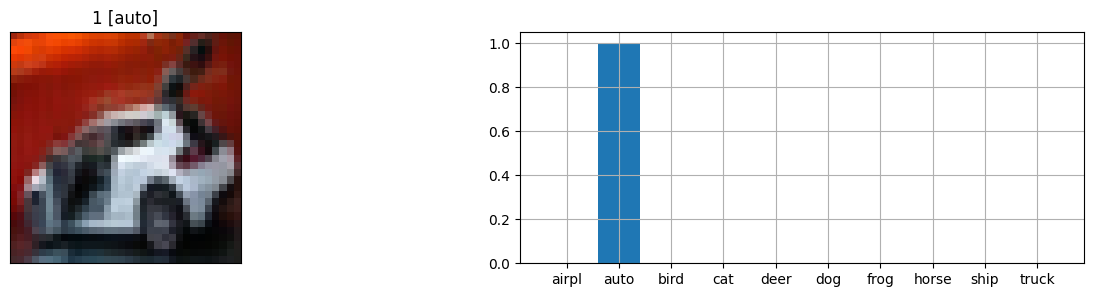

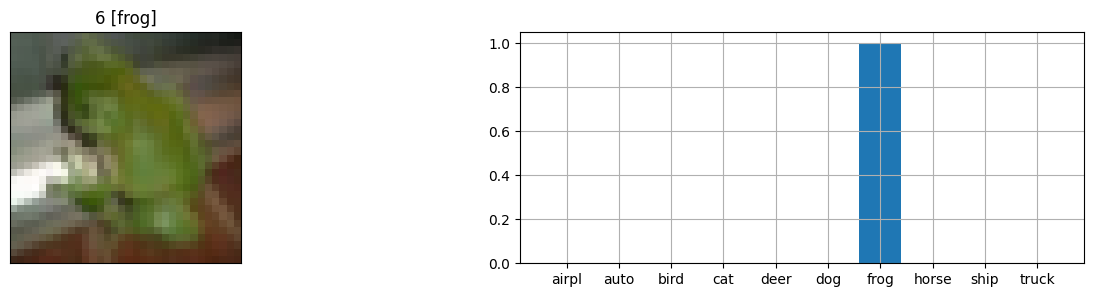

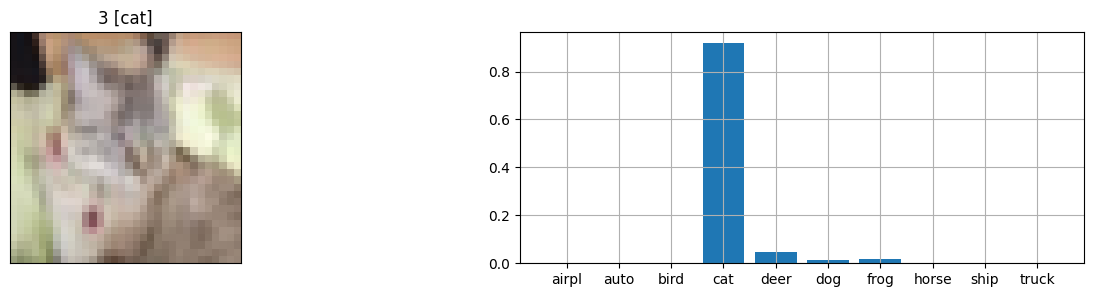

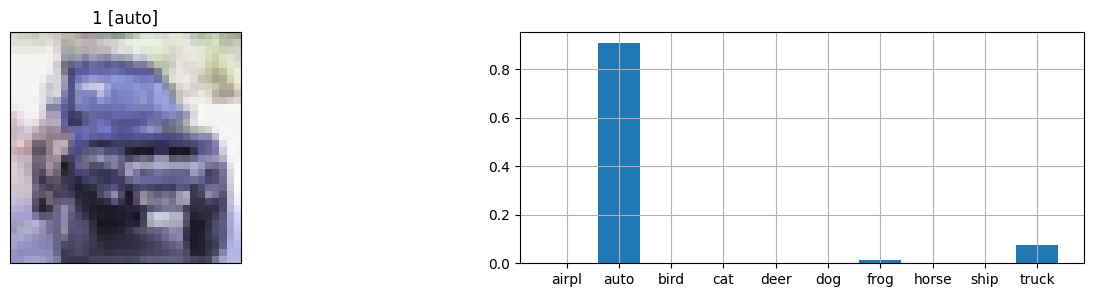

In [97]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features.

In [99]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image

size = 48
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

# Upsample:
x_train = np.array([np.array(Image.fromarray(x).resize(size=(size, size))) for x in train_images_orig])
x_test = np.array([np.array(Image.fromarray(x).resize(size=(size, size))) for x in test_images_orig])

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

features_train = vgg.predict(x_train).reshape((50000, 512))
features_test = vgg.predict(x_test).reshape((10000, 512))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [100]:
print(features_train.shape)
print(features_test.shape)

(50000, 512)
(10000, 512)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-2 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout-2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,282 (3.01 MB)

 Trainable params: 790,282 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

None


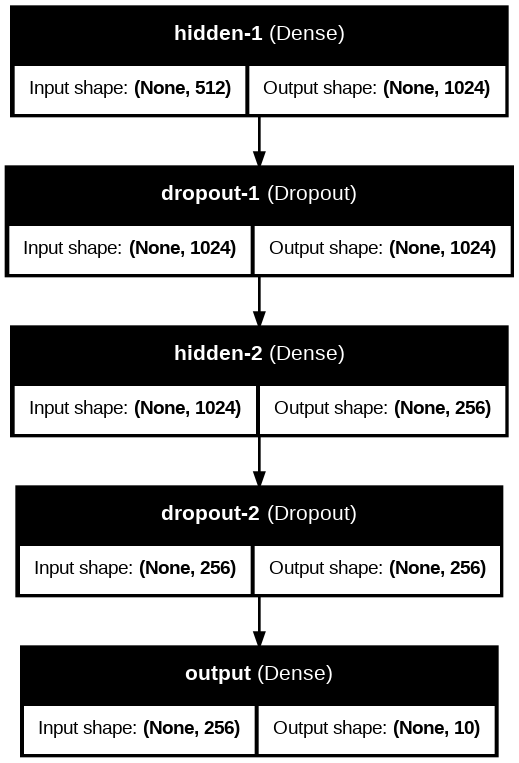

In [102]:
L1=0.0005
L2=0.001

model = keras.Sequential()
model.add(keras.layers.Input(shape=(512,), name="input"))
model.add(keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2), name="hidden-1"))
model.add(keras.layers.Dropout(rate=0.2, name="dropout-1"))
model.add(keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2), name="hidden-2"))
model.add(keras.layers.Dropout(rate=0.2, name="dropout-2"))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

In [103]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [104]:
nepochs = 50
history = model.fit(features_train, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(features_test, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - acc: 0.2265 - loss: 21.4834 - val_acc: 0.5475 - val_loss: 15.4438
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4642 - loss: 16.1344 - val_acc: 0.5732 - val_loss: 14.7683
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5071 - loss: 15.1410 - val_acc: 0.5886 - val_loss: 14.4351
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5261 - loss: 14.6766 - val_acc: 0.6034 - val_loss: 14.1300
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5527 - loss: 14.2785 - val_acc: 0.6223 - val_loss: 13.8032
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5785 - loss: 13.9121 - val_acc: 0.6369 - val_loss: 13.4724
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5946 - loss: 13.5436 - val_acc: 0.6506 - val_loss: 13.1374
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6126 - loss: 13.1844 - val_acc: 0.6587 - val_loss: 12.7983
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

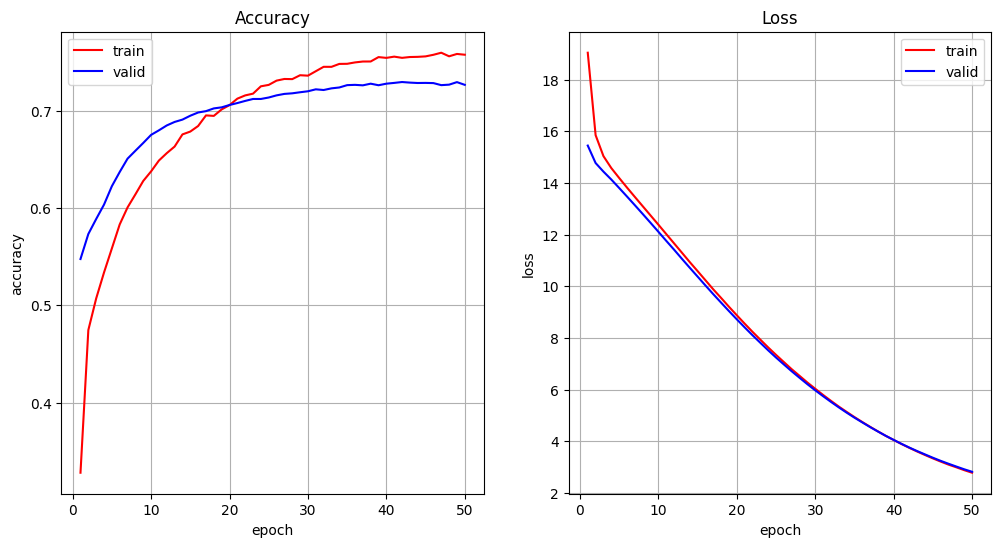

In [105]:
plot_training_curves(history.history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


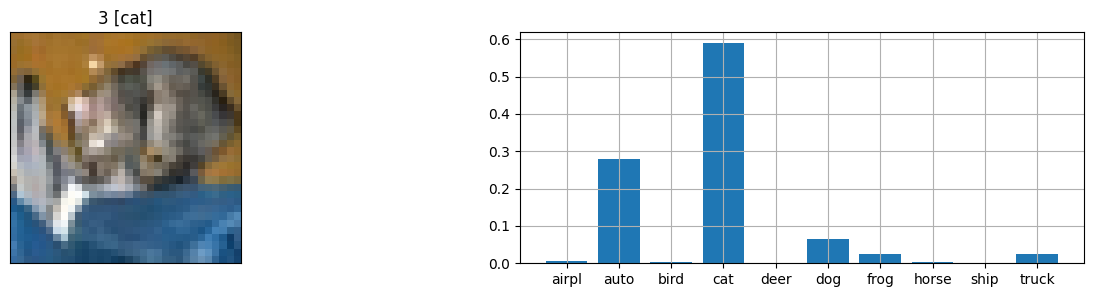

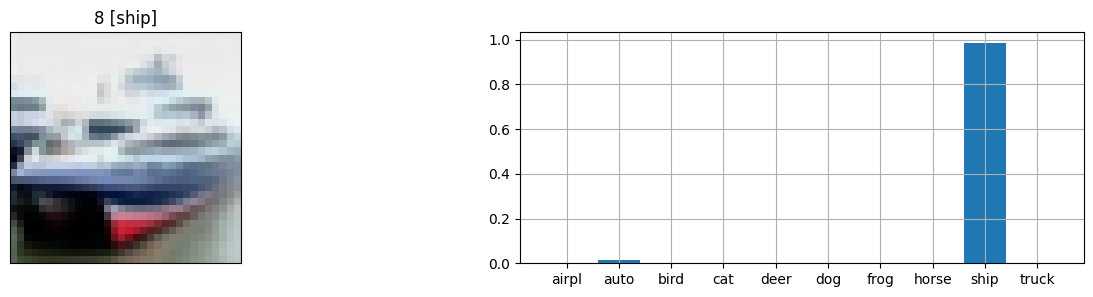

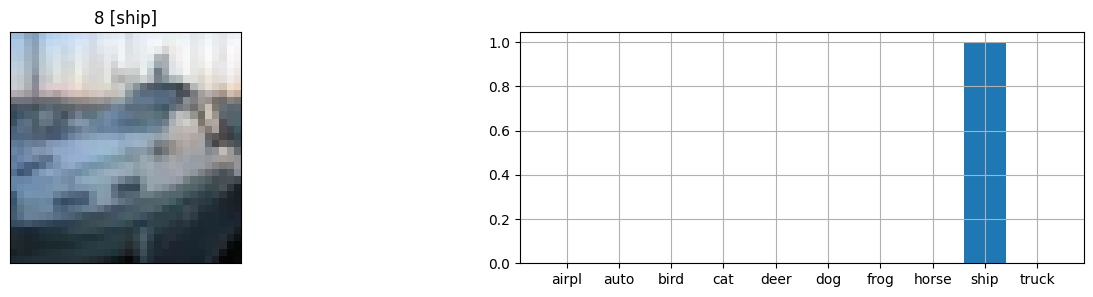

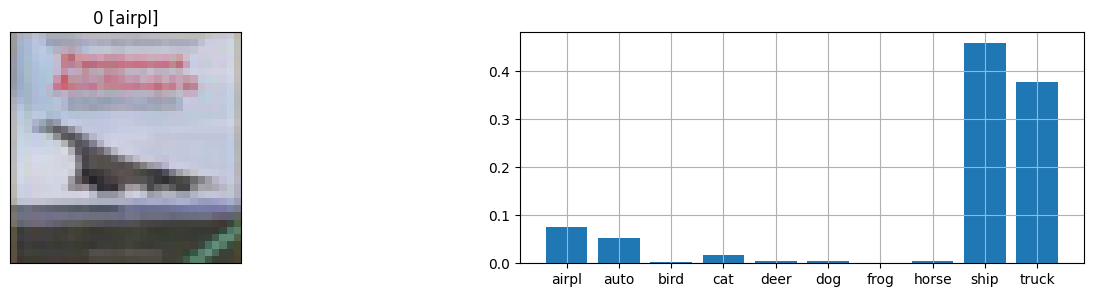

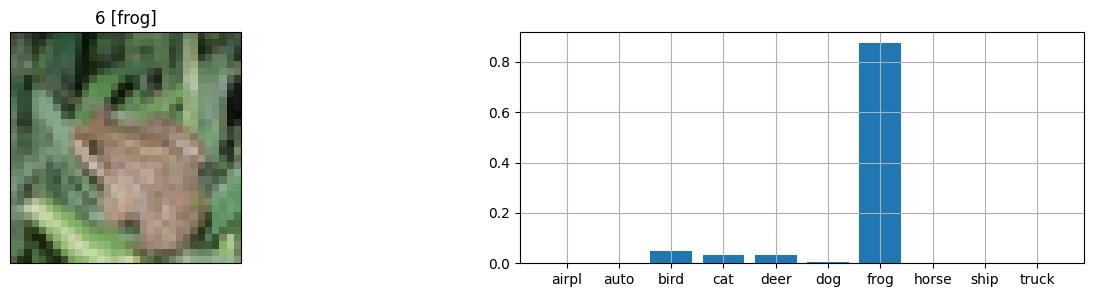

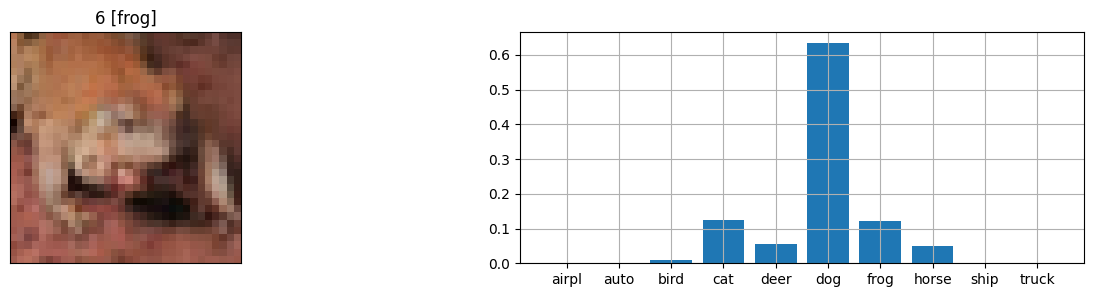

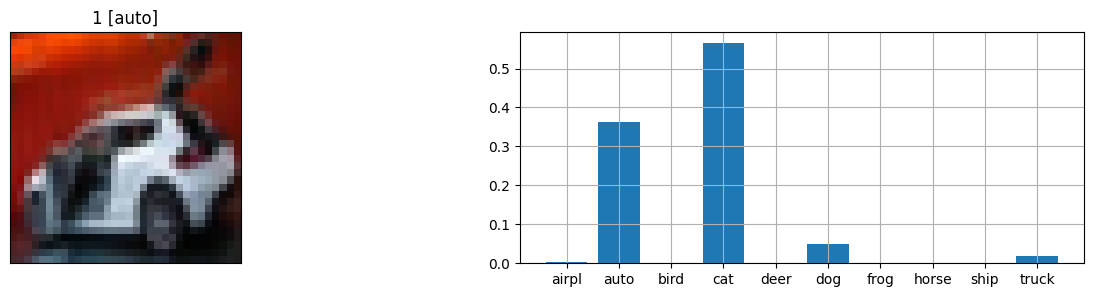

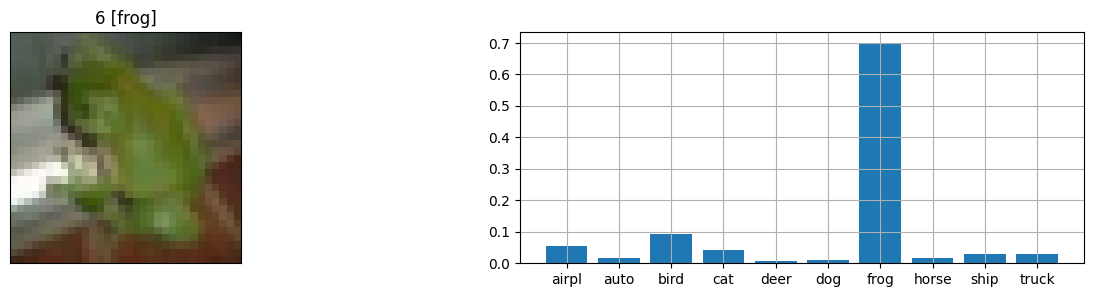

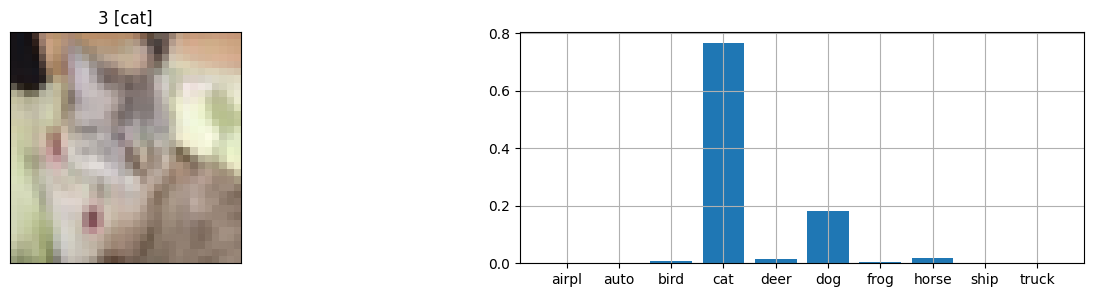

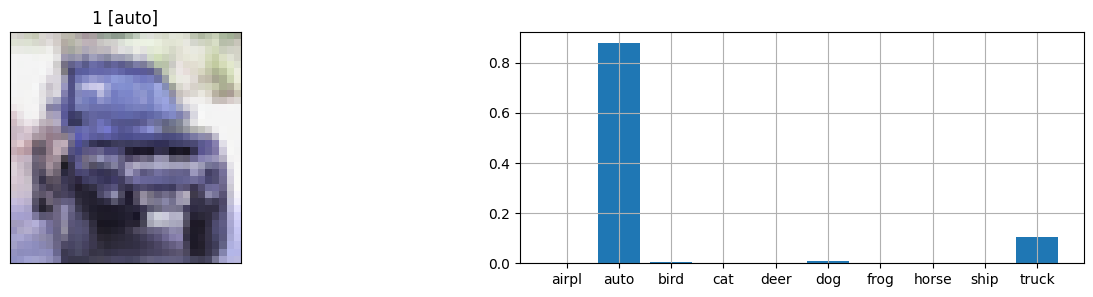

In [106]:
plot_predictions(model, features_test[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model (II)

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features. We re-train (fine tuning) the VGG16 weights.

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 15,504,970 (59.15 MB)

 Trainable params: 15,504,970 (59.15 MB)

 Non-trainable params: 0 (0.00 B)

None


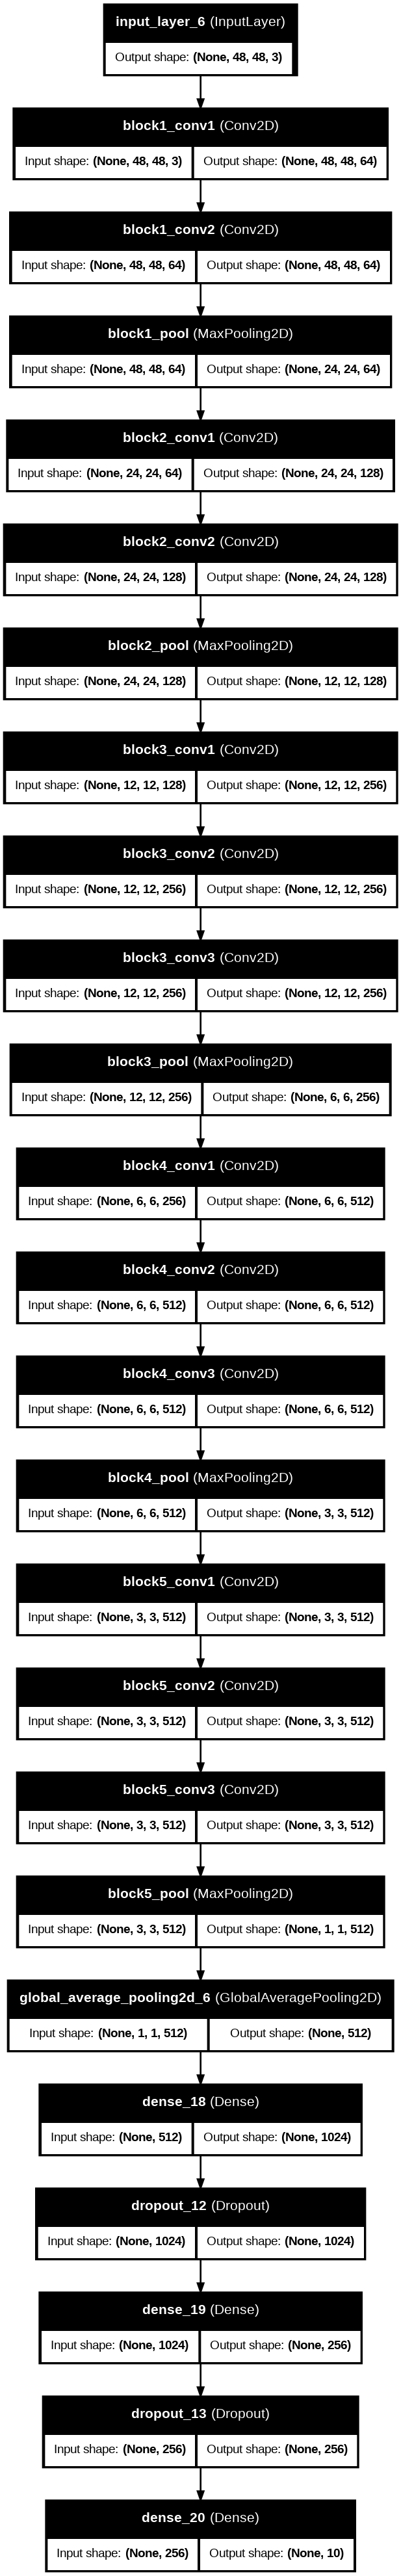

In [128]:
size = 48
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(size, size, 3))

#for layer in vgg.layers[:8]:
#  layer.trainable = False

x = vgg.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2))(x)
x = keras.layers.Dropout(rate=0.2)(x)
x = keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L1L2(l1=L1, l2=L2))(x)
x = keras.layers.Dropout(rate=0.2)(x)

pred = keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(vgg.input, pred)

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

In [129]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [130]:
nepochs = 50
history = model.fit(x_train, train_labels_one_hot,
                    epochs=nepochs,
                    validation_data=(x_test, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.1259 - loss: 17.0179 - val_acc: 0.2934 - val_loss: 15.0196
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - acc: 0.3140 - loss: 14.7674 - val_acc: 0.4624 - val_loss: 13.7843
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.4876 - loss: 13.4730 - val_acc: 0.5352 - val_loss: 12.4285
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.6232 - loss: 12.0777 - val_acc: 0.7647 - val_loss: 11.0315
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.7837 - loss: 10.7538 - val_acc: 0.8005 - val_loss: 10.0349
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.8311 - loss: 9.7334 - val_acc: 0.8390 - val_loss: 9.0632
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - acc: 0.8754 - loss: 8.7565 - val_acc: 0.8506 - val_loss: 8.2249
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - acc: 0.9012 - loss: 7.8777 - val_acc: 0.8620 - val_loss: 7.4283
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step -

Plots:

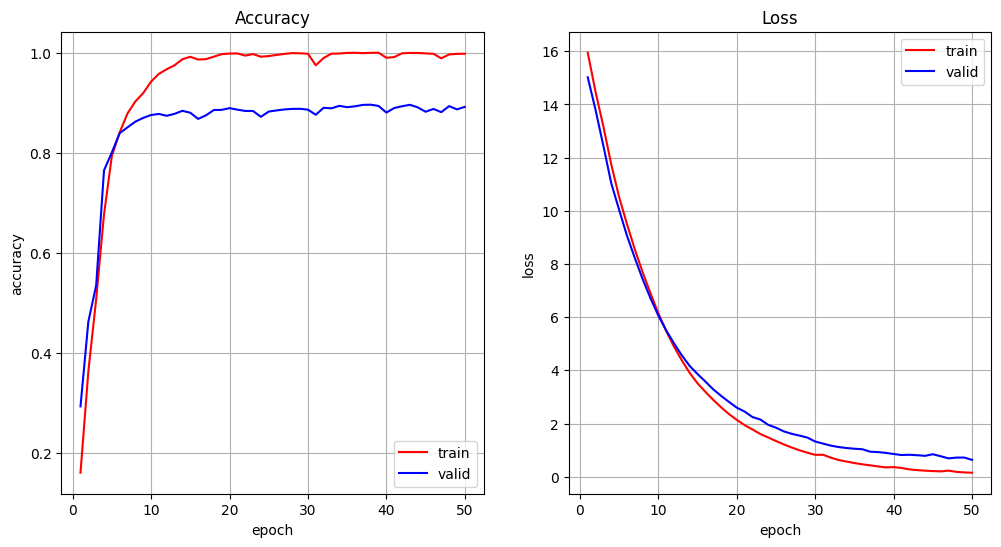

In [131]:
plot_training_curves(history.history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


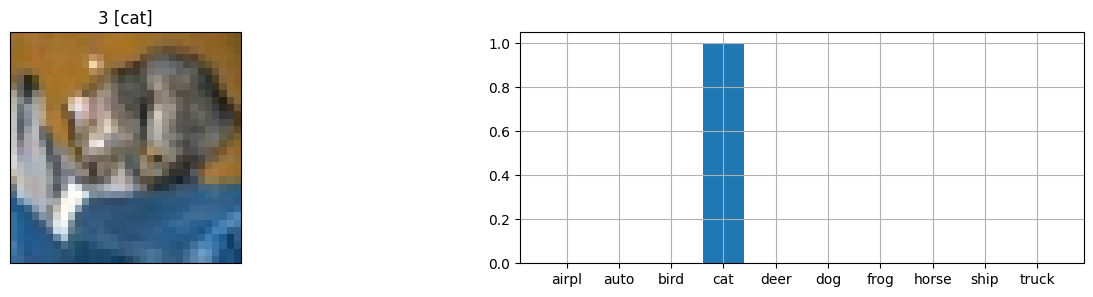

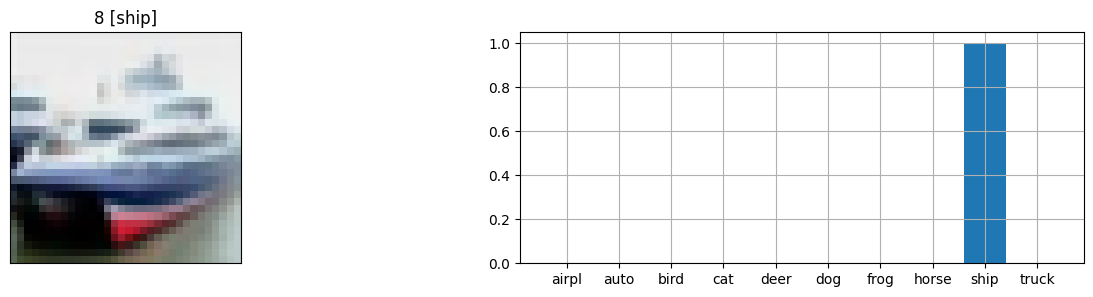

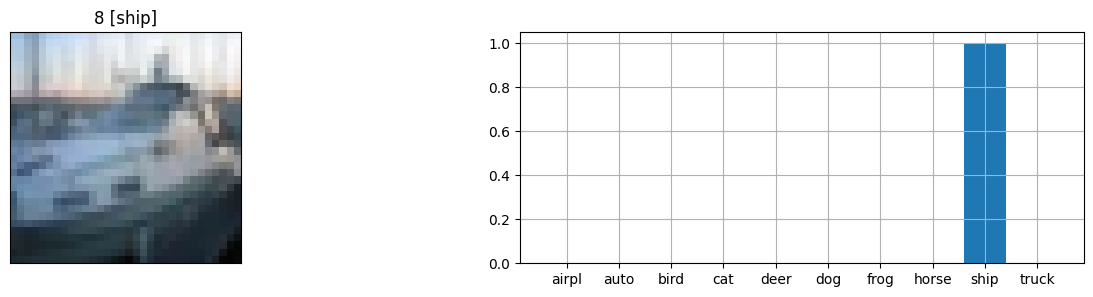

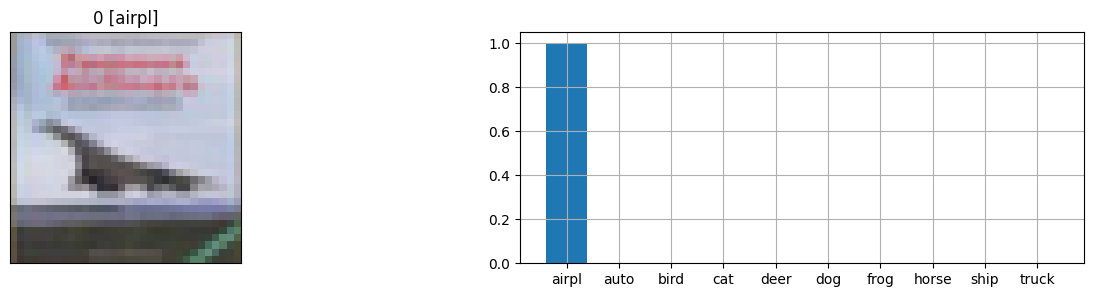

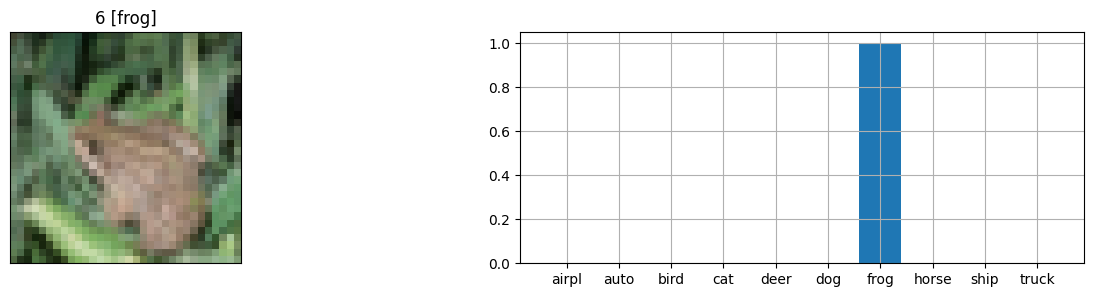

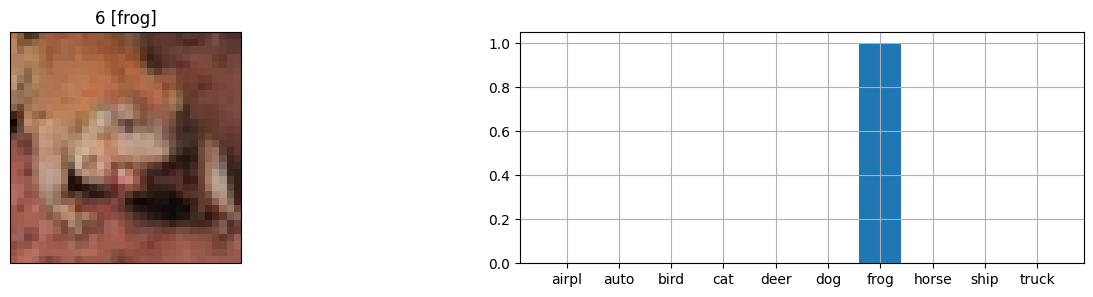

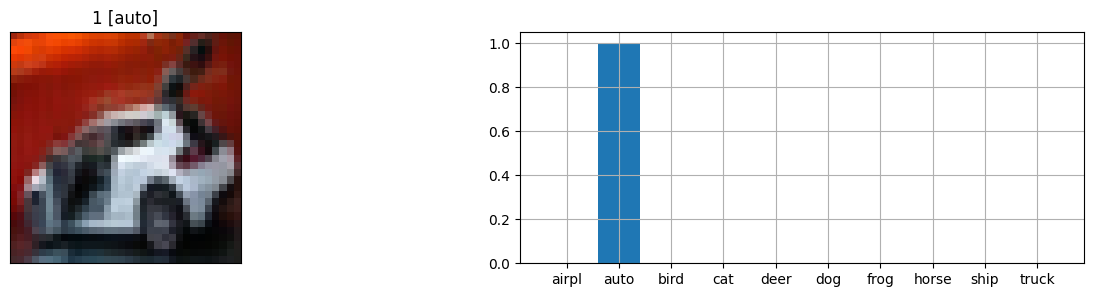

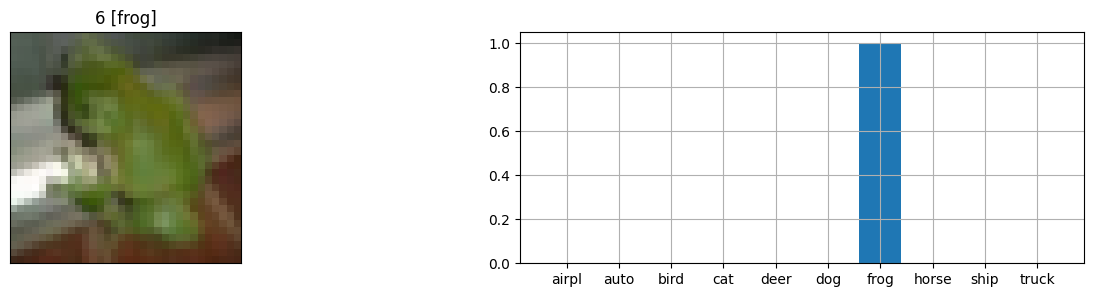

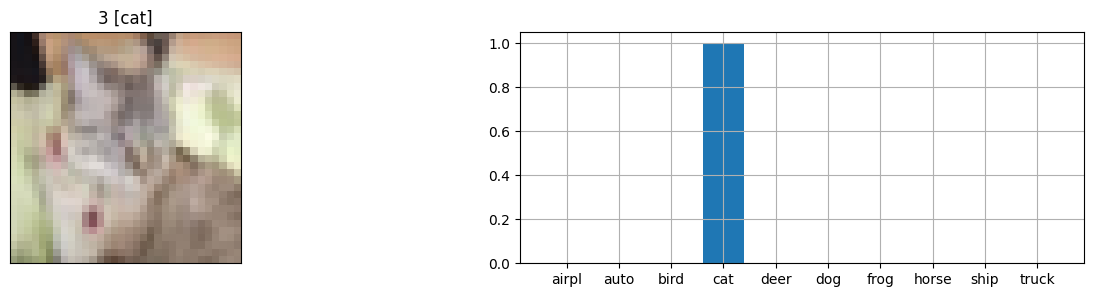

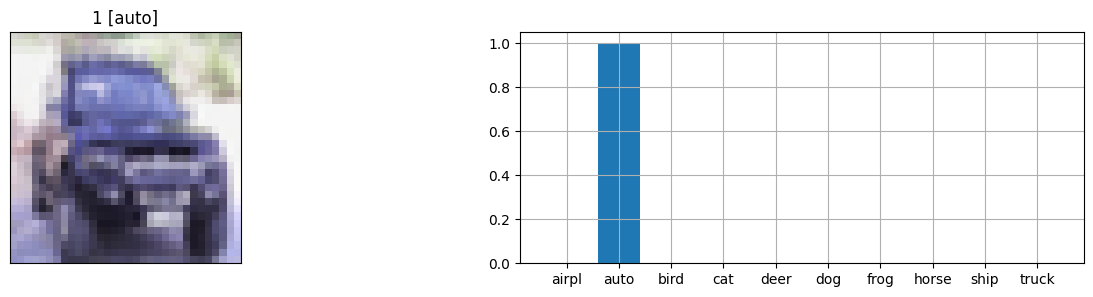

In [132]:
plot_predictions(model, x_test[:10], test_images_orig[:10], test_labels[:10, 0], class_names)